In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
%matplotlib inline

In [2]:
dados = pd.read_csv("dados_SP_modelo.csv", sep=',', low_memory=False)
dados

,Unnamed: 0,data,dias_epidemiológicos,mês,cod7d,cidade,munuf,casos_diários,casos_acumulados,mortes_diárias,mortes_acumuladas,habitantes,casos_por_100mil_hab,mortes_por_milhão_hab,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Total_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,Total_SUS,índice_isolamento
0,0,2020-02-26,1,2,3550308,São Paulo,São Paulo-SP,1,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
1,1,2020-02-27,2,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
2,2,2020-02-28,3,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
3,3,2020-02-29,4,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
4,4,2020-03-01,5,3,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4611,5258,1031,920,476,649,12945,4279,5921,1288,1285,2805,789,16367,0.53000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,8536,2020-05-07,18,5,3542008,Quintana,Quintana-SP,0,2,0,0,6638,30.10000,0.00000,-22.07300,-50.30800,Tropical,meridiano 50 a 60,N,N,Interior,0.73200,Menor de 10 mil,9,Marília,37,Tupã,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53000
8791,8535,2020-05-07,40,5,3550407,São Pedro,São Pedro-SP,9,36,0,0,35653,101.00000,0.00000,-22.54900,-47.91400,Tropical,meridiano 40 a 50,N,N,Interior,0.75500,Maior de 10 mil,6,Piracicaba,28,Piracicaba,12,4,4,2,0,0,22,20,36,8,2,0,0,66,0.53000
8792,8534,2020-05-07,21,5,3503109,Arandu,Arandu-SP,0,10,0,2,6357,157.30000,314.60000,-23.13400,-49.05400,Tropical,meridiano 40 a 50,N,N,Interior,0.68500,Menor de 10 mil,4,Bauru,22,Avaré,0,0,0,0,0,0,0,3,5,4,0,0,0,12,0.53000
8793,8543,2020-05-07,36,5,3500501,Águas de Lindóia,Águas de Lindóia-SP,0,4,0,1,18705,21.40000,53.50000,-22.47600,-46.63300,Tropical,meridiano 40 a 50,N,N,Interior,0.74500,Maior de 10 mil,7,Campinas,33,Amparo,1,7,2,2,0,0,12,3,15,6,6,0,0,30,0.53000


# 1. Feature Engineering

In [3]:
dados2 = dados.drop(columns=['Unnamed: 0', 'cod7d', 'cidade', 'casos_diários', 'mortes_diárias',
                             'casos_por_100mil_hab', 'mortes_por_milhão_hab',
                             'Microrregião Geográfica', 'Nome_Microrregião', 'Mesorregião Geográfica',
                             'Total_Não_SUS', 'Total_SUS'])
dados2

,data,dias_epidemiológicos,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento
0,2020-02-26,1,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
1,2020-02-27,2,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
2,2020-02-28,3,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
3,2020-02-29,4,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
4,2020-03-01,5,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,2020-05-07,18,5,Quintana-SP,2,0,6638,-22.07300,-50.30800,Tropical,meridiano 50 a 60,N,N,Interior,0.73200,Menor de 10 mil,Marília,0,0,0,0,0,0,0,0,0,0,0,0,0.53000
8791,2020-05-07,40,5,São Pedro-SP,36,0,35653,-22.54900,-47.91400,Tropical,meridiano 40 a 50,N,N,Interior,0.75500,Maior de 10 mil,Piracicaba,12,4,4,2,0,0,20,36,8,2,0,0,0.53000
8792,2020-05-07,21,5,Arandu-SP,10,2,6357,-23.13400,-49.05400,Tropical,meridiano 40 a 50,N,N,Interior,0.68500,Menor de 10 mil,Bauru,0,0,0,0,0,0,3,5,4,0,0,0,0.53000
8793,2020-05-07,36,5,Águas de Lindóia-SP,4,1,18705,-22.47600,-46.63300,Tropical,meridiano 40 a 50,N,N,Interior,0.74500,Maior de 10 mil,Campinas,1,7,2,2,0,0,3,15,6,6,0,0,0.53000


Foram excluídas as variáveis cod7d e cidade (ficando apenas com munuf para identificar o município), casos diários e casos por 100 mil habitantes (ficando apenas com casos acumulados), mortes diárias e mortes por milhão de habitantes (ficando apenas com casos acumulados), os totais de leitos SUS e Não SUS, o código da microrregião geográfica e seu nome (pois tem alta correlação com mesorregião geográfica e já temos o município como dado mais granular) e o código da mesorregião geográfica (ficando apenas com o nome da mesorregião).

In [4]:
dados2.isnull().sum()

data                             0
dias_epidemiológicos             0
mês                              0
munuf                            0
casos_acumulados                 0
mortes_acumuladas                0
habitantes                       0
lat                              0
lon                              0
zona geográfica                  0
faixa meridional                 0
capital                          0
litoral                          0
papel                            0
idhm_2010                        0
faixa_pop                        0
Nome_Mesorregião                 0
Cirúrgicos_Não_SUS               0
Clínicos_Não_SUS                 0
Obstétrico_Não_SUS               0
Pediátrico_Não_SUS               0
Outras_Especialidades_Não_SUS    0
Hospital/DIA_Não_SUS             0
Cirúrgicos_SUS                   0
Clínicos_SUS                     0
Obstétrico_SUS                   0
Pediátrico_SUS                   0
Outras_Especialidades_SUS        0
Hospital/DIA_SUS    

In [5]:
dados2.dtypes

data                              object
dias_epidemiológicos               int64
mês                                int64
munuf                             object
casos_acumulados                   int64
mortes_acumuladas                  int64
habitantes                         int64
lat                              float64
lon                              float64
zona geográfica                   object
faixa meridional                  object
capital                           object
litoral                           object
papel                             object
idhm_2010                        float64
faixa_pop                         object
Nome_Mesorregião                  object
Cirúrgicos_Não_SUS                 int64
Clínicos_Não_SUS                   int64
Obstétrico_Não_SUS                 int64
Pediátrico_Não_SUS                 int64
Outras_Especialidades_Não_SUS      int64
Hospital/DIA_Não_SUS               int64
Cirúrgicos_SUS                     int64
Clínicos_SUS    

In [6]:
dados2['data'] = pd.to_datetime(dados2['data'], errors='coerce', infer_datetime_format=True)
dados2.dtypes

data                             datetime64[ns]
dias_epidemiológicos                      int64
mês                                       int64
munuf                                    object
casos_acumulados                          int64
mortes_acumuladas                         int64
habitantes                                int64
lat                                     float64
lon                                     float64
zona geográfica                          object
faixa meridional                         object
capital                                  object
litoral                                  object
papel                                    object
idhm_2010                               float64
faixa_pop                                object
Nome_Mesorregião                         object
Cirúrgicos_Não_SUS                        int64
Clínicos_Não_SUS                          int64
Obstétrico_Não_SUS                        int64
Pediátrico_Não_SUS                      

In [7]:
dados2.nunique()

data                              72
dias_epidemiológicos              72
mês                                4
munuf                            383
casos_acumulados                 406
mortes_acumuladas                110
habitantes                       382
lat                              363
lon                              370
zona geográfica                    2
faixa meridional                   2
capital                            2
litoral                            2
papel                              3
idhm_2010                        129
faixa_pop                          4
Nome_Mesorregião                  15
Cirúrgicos_Não_SUS                76
Clínicos_Não_SUS                  90
Obstétrico_Não_SUS                48
Pediátrico_Não_SUS                46
Outras_Especialidades_Não_SUS     45
Hospital/DIA_Não_SUS              35
Cirúrgicos_SUS                    80
Clínicos_SUS                     117
Obstétrico_SUS                    55
Pediátrico_SUS                    57
O

In [8]:
dados2.head()

,data,dias_epidemiológicos,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento
0,2020-02-26,1,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
1,2020-02-27,2,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
2,2020-02-28,3,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
3,2020-02-29,4,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
4,2020-03-01,5,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000


In [9]:
dados2.columns

Index(['data', 'dias_epidemiológicos', 'mês', 'munuf', 'casos_acumulados',
       'mortes_acumuladas', 'habitantes', 'lat', 'lon', 'zona geográfica',
       'faixa meridional', 'capital', 'litoral', 'papel', 'idhm_2010',
       'faixa_pop', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento'],
      dtype='object')

## 1.1. Criar dia do ano

In [10]:
dados2['dia_do_ano'] = [n.dayofyear for n in dados2['data']]
colunas = ['data', 'dias_epidemiológicos', 'dia_do_ano', 'mês', 'munuf', 'casos_acumulados',
       'mortes_acumuladas', 'habitantes', 'lat', 'lon', 'zona geográfica',
       'faixa meridional', 'capital', 'litoral', 'papel', 'idhm_2010',
       'faixa_pop', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento']
dados2 = dados2.reindex(columns=colunas)
dados2.head()

,data,dias_epidemiológicos,dia_do_ano,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento
0,2020-02-26,1,57,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
1,2020-02-27,2,58,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
2,2020-02-28,3,59,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
3,2020-02-29,4,60,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
4,2020-03-01,5,61,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000


## 1.2. Criar lags para casos e mortes acumulados

In [11]:
n = 1
radical = 'casos_acumulados_menos'
nome = '{}{}d'.format(radical, n)
while n < 15:
    dados2[nome] = dados2.groupby(['munuf'])['casos_acumulados'].shift(periods=n,axis='index',fill_value=0)
    n = n + 1
    nome = '{}{}d'.format(radical, n)

In [12]:
dados2.columns

Index(['data', 'dias_epidemiológicos', 'dia_do_ano', 'mês', 'munuf',
       'casos_acumulados', 'mortes_acumuladas', 'habitantes', 'lat', 'lon',
       'zona geográfica', 'faixa meridional', 'capital', 'litoral', 'papel',
       'idhm_2010', 'faixa_pop', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento',
       'casos_acumulados_menos1d', 'casos_acumulados_menos2d',
       'casos_acumulados_menos3d', 'casos_acumulados_menos4d',
       'casos_acumulados_menos5d', 'casos_acumulados_menos6d',
       'casos_acumulados_menos7d', 'casos_acumulados_menos8d',
       'casos_acumulados_menos9d', 'casos_acumulados_menos10d',
       'casos_acumulados_menos11d', 'casos_acumulados_menos12d',
       'casos_acumulados_menos13d

In [13]:
n = 1
radical = 'mortes_acumuladas_menos'
nome = '{}{}d'.format(radical, n)
while n < 15:
    dados2[nome] = dados2.groupby(['munuf'])['mortes_acumuladas'].shift(periods=n,axis='index',fill_value=0)
    n = n + 1
    nome = '{}{}d'.format(radical, n)

In [14]:
dados2.columns

Index(['data', 'dias_epidemiológicos', 'dia_do_ano', 'mês', 'munuf',
       'casos_acumulados', 'mortes_acumuladas', 'habitantes', 'lat', 'lon',
       'zona geográfica', 'faixa meridional', 'capital', 'litoral', 'papel',
       'idhm_2010', 'faixa_pop', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento',
       'casos_acumulados_menos1d', 'casos_acumulados_menos2d',
       'casos_acumulados_menos3d', 'casos_acumulados_menos4d',
       'casos_acumulados_menos5d', 'casos_acumulados_menos6d',
       'casos_acumulados_menos7d', 'casos_acumulados_menos8d',
       'casos_acumulados_menos9d', 'casos_acumulados_menos10d',
       'casos_acumulados_menos11d', 'casos_acumulados_menos12d',
       'casos_acumulados_menos13d

## 1.3. Criar dummies e label encoder para categóricas

In [15]:
dum = pd.get_dummies(dados2, 
                      columns=['zona geográfica','faixa meridional','capital', 'litoral', 'papel', 'faixa_pop'],
                      drop_first=True, 
                      prefix = ['zona geográfica','faixa meridional','capital', 'litoral', 'papel', 'faixa_pop'],
                      prefix_sep='_')
dum.head()

,data,dias_epidemiológicos,dia_do_ano,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,idhm_2010,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil
0,2020-02-26,1,57,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,2020-02-27,2,58,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,2020-02-28,3,59,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,2020-02-29,4,60,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,2020-03-01,5,61,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [16]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le_tkt = le.fit_transform(dum['munuf'])
le_tkt_df1 = pd.DataFrame(le_tkt, columns=['LE_munuf'])

le_tkt = le.fit_transform(dum['Nome_Mesorregião'])
le_tkt_df2 = pd.DataFrame(le_tkt, columns=['LE_Nome_Mesorregião'],)

dados_tratados = pd.merge(dum,le_tkt_df1, left_index=True, right_index=True)
dados_tratados = pd.merge(dados_tratados,le_tkt_df2, left_index=True, right_index=True)

dados_tratados.head()

,data,dias_epidemiológicos,dia_do_ano,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,idhm_2010,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil,LE_munuf,LE_Nome_Mesorregião
0,2020-02-26,1,57,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
1,2020-02-27,2,58,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
2,2020-02-28,3,59,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
3,2020-02-29,4,60,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
4,2020-03-01,5,61,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9


In [17]:
dados_tratados.columns

Index(['data', 'dias_epidemiológicos', 'dia_do_ano', 'mês', 'munuf',
       'casos_acumulados', 'mortes_acumuladas', 'habitantes', 'lat', 'lon',
       'idhm_2010', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento',
       'casos_acumulados_menos1d', 'casos_acumulados_menos2d',
       'casos_acumulados_menos3d', 'casos_acumulados_menos4d',
       'casos_acumulados_menos5d', 'casos_acumulados_menos6d',
       'casos_acumulados_menos7d', 'casos_acumulados_menos8d',
       'casos_acumulados_menos9d', 'casos_acumulados_menos10d',
       'casos_acumulados_menos11d', 'casos_acumulados_menos12d',
       'casos_acumulados_menos13d', 'casos_acumulados_menos14d',
       'mortes_acumuladas_menos1d', 'mortes_acumuladas_men

In [18]:
dados_sel = dados_tratados[['dias_epidemiológicos', 'dia_do_ano', 'mês',
       'casos_acumulados', 'mortes_acumuladas', 'habitantes', 'lat', 'lon',
       'idhm_2010', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento',
       'casos_acumulados_menos1d', 'casos_acumulados_menos2d',
       'casos_acumulados_menos3d', 'casos_acumulados_menos4d',
       'casos_acumulados_menos5d', 'casos_acumulados_menos6d',
       'casos_acumulados_menos7d', 'casos_acumulados_menos8d',
       'casos_acumulados_menos9d', 'casos_acumulados_menos10d',
       'casos_acumulados_menos11d', 'casos_acumulados_menos12d',
       'casos_acumulados_menos13d', 'casos_acumulados_menos14d',
       'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d',
       'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d',
       'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d',
       'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d',
       'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d',
       'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d',
       'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d',
       'zona geográfica_Tropical', 'faixa meridional_meridiano 50 a 60',
       'capital_S', 'litoral_S', 'papel_Interior', 'papel_Metropolitana',
       'faixa_pop_Maior de 100 mil', 'faixa_pop_Maior de 50 mil',
       'faixa_pop_Menor de 10 mil', 'LE_munuf', 'LE_Nome_Mesorregião']]

In [19]:
dados_sel.head()

,dias_epidemiológicos,dia_do_ano,mês,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,idhm_2010,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil,LE_munuf,LE_Nome_Mesorregião
0,1,57,2,1,0,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
1,2,58,2,1,0,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
2,3,59,2,1,0,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
3,4,60,2,1,0,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
4,5,61,3,1,0,12252023,-23.54800,-46.63600,0.80500,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9


## 1.4. Baseline e Validação

Vamos estabelecer que a base para comparação da previsão serão os casos e mortes do dia anterior. Ou seja, se prevíssemos que os casos e mortes de hoje serão iguais aos casos e mortes do dia anterior, o quanto estaríamos errando? O objetivo do modelo será superar esse erro médio.

#### Métricas para avaliar o modelo

Para analisar se as previsões estão com os valores próximos dos dados reais deve-se fazer a medição do erro, o erro (ou resíduo) neste caso é basicamente Yreal − Yprev.

Avalia-se o erro nos dados de treino para verificar se o modelo tem boa assertividade, e valida-se o modelo verificando o erro nos dados de teste (dados que não foram “vistos” pelo modelo).

Abaixo estão as principais métricas usadas para avaliar modelos de séries temporais:

##### Mean Forecast Error — (Erro Médio da Previsão ou Viés)

O erro médio da previsão nada mais é do que a média dos erros da série avaliada, os valores podem ser positivos ou negativos. Essa métrica sugere que o modelo tende a fazer previsões acima do real (erros negativos) ou abaixo do real (erros positivos), desse modo também pode-se dizer que o erro médio é o viés do modelo.

##### MAE — Mean Absolute Error — (Erro Médio Absoluto)

Essa métrica é muito semelhante ao erro médio da previsão mencionado acima, a única diferença é o erro com valor negativo, ou seja, a previsão com valor maior que o número real, é transformado em positivo e posteriormente a média é calculada.

Essa métrica é muito usada em séries temporais, pois há casos que o erro negativo pode zerar o positivo ou dar uma ideia que o modelo é preciso. No caso do MAE isso não acontece, pois essa métrica mostra o quanto a previsão está longe dos valores reais, independente se acima ou abaixo.

##### MSE — Mean Squared Error — (Erro Quadrático Médio)

Essa métrica coloca mais peso nos erros maiores, pois cada valor individual do erro é elevado ao quadrado e posteriormente a média desses valores é calculada. Assim, essa métrica é muito sensível à outliers e coloca bastante peso nas previsões com erros mais significativos.

Diferente do MAE e MFE, os valores do MSE estão em unidades quadráticas e não na unidade do modelo.

##### RMSE — Root Mean Squared Error — (Raiz Quadrada do Erro Quadrático Médio)

Essa métrica é simplesmente a raiz quadrada do MSE, onde o erro volta a ter a unidade de medida do modelo. É muito usada em séries temporais porque é mais sensível à erros maiores devido ao processo de elevação ao quadrado que a originou.

##### MAPE — Mean Absolute Percentage Error — (Erro Percentual Médio Absoluto)

Essa é outra métrica interessante de ser usada, pois o erro é medido em termos percentuais e pode-se comparar o erro percentual do modelo de um objeto X com o erro percentual de um objeto Y. O cálculo dessa métrica pega o valor absoluto do erro dividido pelo resultado real e posteriormente é calculada a média.

In [20]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

def check_erro(orig, prev, nome_col='', nome_indice=''):
    
    vies = np.mean(orig - prev)
    mse = mean_squared_error(orig, prev)
    rmse = sqrt(mean_squared_error(orig, prev))
    mae = mean_absolute_error(orig, prev)
    mape = np.mean(np.abs((orig - prev) / orig)) * 100
    
    grupo_erro = [vies, mse, rmse, mae, mape]
    serie = pd.DataFrame(grupo_erro, index=['VIÉS','MSE','RMSE','MAE', 'MAPE'], columns=[nome_col])
    serie.index.name = nome_indice
    
    return serie

### 1.4.1. Casos Acumulados

In [21]:
df_casos = dados_tratados[['data', 'casos_acumulados', 'casos_acumulados_menos1d']].copy()

In [22]:
df_casos.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real', 'casos_acumulados_menos1d': 'previsão'}
df_casos.rename(columns=colunas, inplace=True)
#df_casos = df_casos.iloc[1:]
df_casos

,real,previsão
data,,
2020-02-26,1,0
2020-02-27,1,1
2020-02-28,1,1
2020-02-29,1,1
2020-03-01,1,1
...,...,...
2020-05-07,2,2
2020-05-07,36,27
2020-05-07,10,10


In [23]:
check_erro(df_casos['real'].values, df_casos['previsão'], nome_col='Baseline', nome_indice='Base Completa')

,Baseline
Base Completa,
VIÉS,4.54008
MSE,2534.63900
RMSE,50.34520
MAE,4.65810
MAPE,11.77102


In [24]:
def plotar_erro(df, figsize=(18,8)):
    
    # Criando a coluna do erro
    df['Erro'] = df.iloc[:,0] - df.iloc[:,1]
    
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0))
    ax4 = plt.subplot2grid((2,2), (1,1))
    
    #Plotando os valores reais e previstos
    ax1.plot(df.iloc[:,0:2])
    ax1.legend(['Real','Prev'])
    ax1.set_title('Valores Previstos vs Resíduo')
    
    # Erro vs Valores previstos
    ax2.scatter(df.iloc[:,1], df.iloc[:,2])
    ax2.set_xlabel('Valores Previstos')
    ax2.set_ylabel('Resíduo')
    ax2.set_title('Resíduo vs Valores Previstos')
    
    ## QQ Plot do erro
    sm.graphics.qqplot(df.iloc[:,2], line='r', ax=ax3)
    
    # Gráfico de autocorrelação do Erro
    plot_acf(df.iloc[:,2], lags=60,zero=False, ax=ax4)
    plt.tight_layout()
    plt.show()

C:\Users\gusta\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


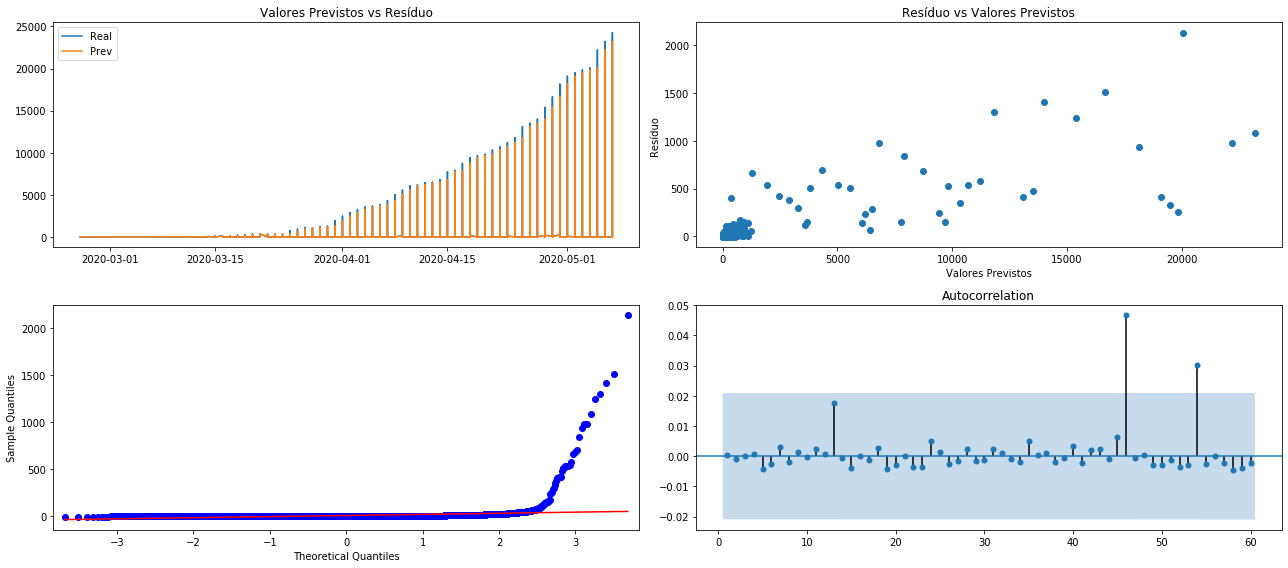

In [25]:
plotar_erro(df_casos)

### 1.4.2. Mortes Acumuladas

In [26]:
df_mortes = dados_tratados[['data', 'mortes_acumuladas', 'mortes_acumuladas_menos1d']].copy()

In [27]:
df_mortes.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real', 'mortes_acumuladas_menos1d': 'previsão'}
df_mortes.rename(columns=colunas, inplace=True)
#df_mortes = df_mortes.iloc[1:]
df_mortes

,real,previsão
data,,
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,0,0
2020-02-29,0,0
2020-03-01,0,0
...,...,...
2020-05-07,0,0
2020-05-07,0,0
2020-05-07,2,2


In [28]:
check_erro(df_mortes['real'].values, df_mortes['previsão'], nome_col='Baseline', nome_indice='Base Completa')

,Baseline
Base Completa,
VIÉS,0.36453
MSE,21.03945
RMSE,4.58688
MAE,0.38204
MAPE,9.12069


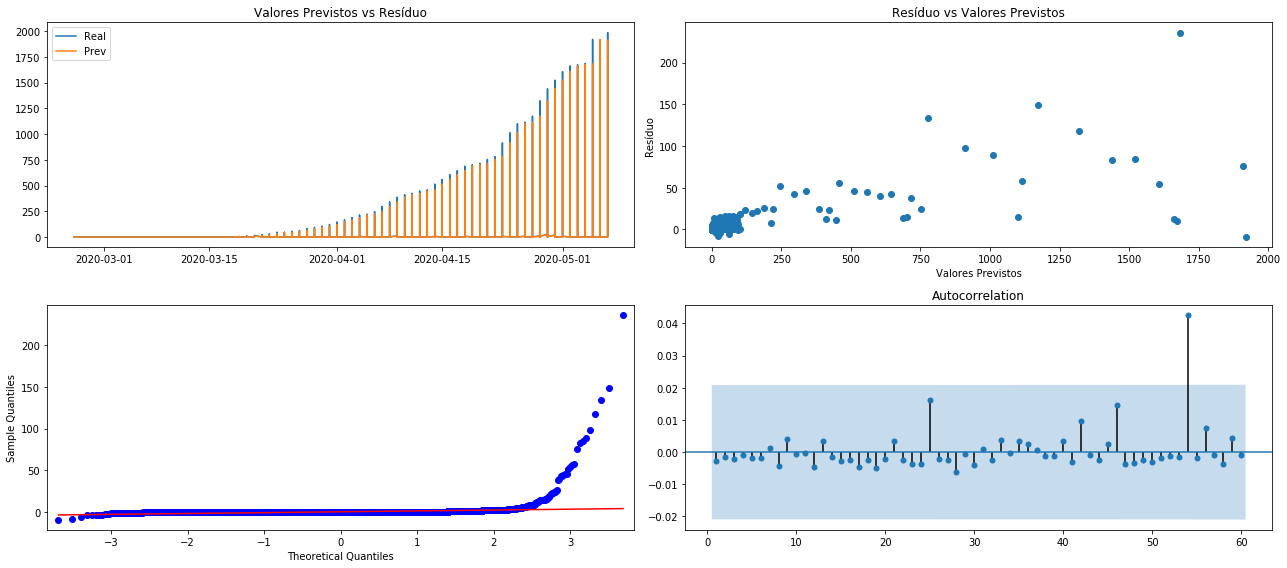

In [29]:
plotar_erro(df_mortes)

## 1.5. Separação da base em variáveis explicativas, target casos acumulados e target mortes acumuladas

In [30]:
pd.set_option('display.max_rows', 20)

In [31]:
explicativas = dados_sel.drop(columns=['casos_acumulados', 'mortes_acumuladas'])

In [32]:
explicativas.dtypes

dias_epidemiológicos            int64
dia_do_ano                      int64
mês                             int64
habitantes                      int64
lat                           float64
                               ...   
faixa_pop_Maior de 100 mil      uint8
faixa_pop_Maior de 50 mil       uint8
faixa_pop_Menor de 10 mil       uint8
LE_munuf                        int32
LE_Nome_Mesorregião             int32
Length: 59, dtype: object

In [33]:
target_casos = dados_sel['casos_acumulados']
target_mortes = dados_sel['mortes_acumuladas']

## 1.6. Modificação da distribuição das targets

Como a distribuição das targets está muito concentrada no zero, vamos aplicar uma função logarítmica para melhorar a performance do modelo.

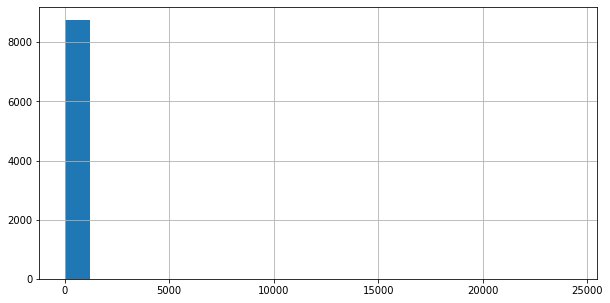

In [34]:
target_casos.hist(bins=20, figsize=(10,5))

In [35]:
target_casos_log = np.log1p(target_casos)

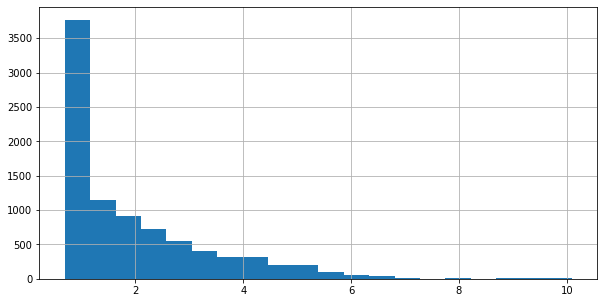

In [36]:
target_casos_log.hist(bins=20, figsize=(10,5))

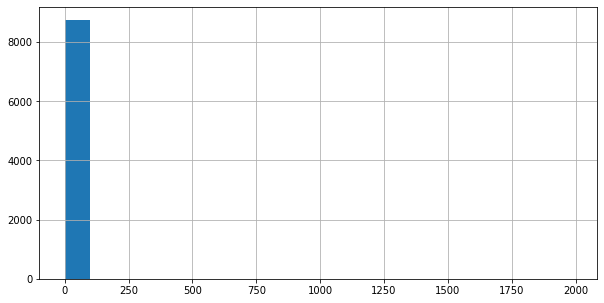

In [37]:
target_mortes.hist(bins=20, figsize=(10,5))

In [38]:
target_mortes_log = np.log1p(target_mortes)

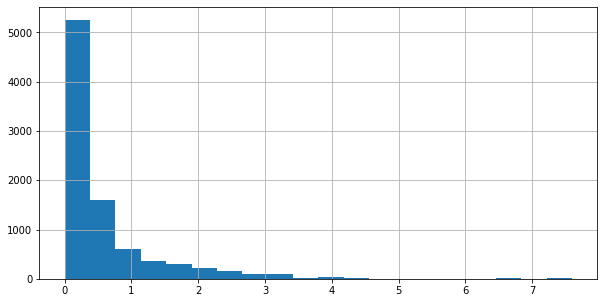

In [39]:
target_mortes_log.hist(bins=20, figsize=(10,5))

## 1.7. Seleção de Variáveis

### 1.7.1. Seleção baseada em filtro

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#### 1.7.1.1. Casos acumulados

In [41]:
chi_selector1 = SelectKBest(chi2, k=30)
chi_selector1.fit(explicativas.abs(), target_casos)
chi_support1 = chi_selector1.get_support()
chi_feature1 = explicativas.loc[:,chi_support1].columns.tolist()
print(str(len(chi_feature1)), 'é o numero de variáveis selecionadas')
print(chi_feature1)

30 é o numero de variáveis selecionadas
['habitantes', 'Cirúrgicos_Não_SUS', 'Clínicos_Não_SUS', 'Cirúrgicos_SUS', 'Clínicos_SUS', 'Outras_Especialidades_SUS', 'casos_acumulados_menos1d', 'casos_acumulados_menos2d', 'casos_acumulados_menos3d', 'casos_acumulados_menos4d', 'casos_acumulados_menos5d', 'casos_acumulados_menos6d', 'casos_acumulados_menos7d', 'casos_acumulados_menos8d', 'casos_acumulados_menos9d', 'casos_acumulados_menos10d', 'casos_acumulados_menos11d', 'casos_acumulados_menos12d', 'casos_acumulados_menos13d', 'casos_acumulados_menos14d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d']


#### 1.7.1.2. Mortes acumuladas

In [42]:
chi_selector2 = SelectKBest(chi2, k=30)
chi_selector2.fit(explicativas.abs(), target_mortes)
chi_support2 = chi_selector2.get_support()
chi_feature2 = explicativas.loc[:,chi_support2].columns.tolist()
print(str(len(chi_feature2)), 'é o numero de variáveis selecionadas')
print(chi_feature2)

30 é o numero de variáveis selecionadas
['habitantes', 'Cirúrgicos_Não_SUS', 'Clínicos_Não_SUS', 'Cirúrgicos_SUS', 'Clínicos_SUS', 'Outras_Especialidades_SUS', 'casos_acumulados_menos1d', 'casos_acumulados_menos2d', 'casos_acumulados_menos3d', 'casos_acumulados_menos4d', 'casos_acumulados_menos5d', 'casos_acumulados_menos6d', 'casos_acumulados_menos7d', 'casos_acumulados_menos8d', 'casos_acumulados_menos9d', 'casos_acumulados_menos10d', 'casos_acumulados_menos11d', 'casos_acumulados_menos12d', 'casos_acumulados_menos13d', 'casos_acumulados_menos14d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d']


### 1.8.2. Seleção baseada em wrapper

In [43]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

#### 1.8.2.1. Casos acumulados

In [44]:
rfecv_selector1 = RFECV(estimator=LinearRegression(), step=10)
rfecv_selector1.fit(explicativas, target_casos_log)
rfecv_support1 = rfecv_selector1.get_support()
rfecv_feature1 = explicativas.loc[:,rfecv_support1].columns.tolist()
print(str(len(rfecv_feature1)), 'é o numero de variáveis selecionadas')
print(rfecv_feature1)

29 é o numero de variáveis selecionadas
['dias_epidemiológicos', 'dia_do_ano', 'mês', 'lat', 'lon', 'idhm_2010', 'Pediátrico_Não_SUS', 'Hospital/DIA_Não_SUS', 'Pediátrico_SUS', 'índice_isolamento', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d', 'zona geográfica_Tropical', 'faixa meridional_meridiano 50 a 60', 'capital_S', 'litoral_S', 'papel_Interior', 'papel_Metropolitana', 'faixa_pop_Maior de 100 mil', 'faixa_pop_Maior de 50 mil', 'faixa_pop_Menor de 10 mil']


#### 1.8.2.2. Mortes acumuladas

In [45]:
rfecv_selector2 = RFECV(estimator=LinearRegression(), step=10)
rfecv_selector2.fit(explicativas, target_mortes_log)
rfecv_support2 = rfecv_selector2.get_support()
rfecv_feature2 = explicativas.loc[:,rfecv_support2].columns.tolist()
print(str(len(rfecv_feature2)), 'é o numero de variáveis selecionadas')
print(rfecv_feature2)

19 é o numero de variáveis selecionadas
['dias_epidemiológicos', 'dia_do_ano', 'mês', 'idhm_2010', 'índice_isolamento', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d', 'zona geográfica_Tropical', 'faixa meridional_meridiano 50 a 60', 'capital_S', 'litoral_S', 'papel_Interior', 'papel_Metropolitana', 'faixa_pop_Maior de 100 mil', 'faixa_pop_Maior de 50 mil']


### 1.8.3. Seleção baseada em método embarcado

In [46]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

#### 1.8.3.1. Casos acumulados

In [47]:
rf_selector1 = SelectFromModel(RandomForestRegressor(n_estimators=300, random_state=14))
rf_selector1.fit(explicativas, target_casos)
rf_support1 = rf_selector1.get_support()
rf_feature1 = explicativas.loc[:,rf_support1].columns.tolist()
print(str(len(rf_feature1)), 'é o numero de variáveis selecionadas')
print(rf_feature1)

28 é o numero de variáveis selecionadas
['casos_acumulados_menos1d', 'casos_acumulados_menos2d', 'casos_acumulados_menos3d', 'casos_acumulados_menos4d', 'casos_acumulados_menos5d', 'casos_acumulados_menos6d', 'casos_acumulados_menos7d', 'casos_acumulados_menos8d', 'casos_acumulados_menos9d', 'casos_acumulados_menos10d', 'casos_acumulados_menos11d', 'casos_acumulados_menos12d', 'casos_acumulados_menos13d', 'casos_acumulados_menos14d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d', 'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d']


#### 1.8.3.2. Mortes acumuladas

In [48]:
rf_selector2 = SelectFromModel(RandomForestRegressor(n_estimators=300, random_state=14))
rf_selector2.fit(explicativas, target_mortes)
rf_support2 = rf_selector2.get_support()
rf_feature2 = explicativas.loc[:,rf_support2].columns.tolist()
print(str(len(rf_feature2)), 'é o numero de variáveis selecionadas')
print(rf_feature2)

28 é o numero de variáveis selecionadas
['casos_acumulados_menos1d', 'casos_acumulados_menos2d', 'casos_acumulados_menos3d', 'casos_acumulados_menos4d', 'casos_acumulados_menos5d', 'casos_acumulados_menos6d', 'casos_acumulados_menos7d', 'casos_acumulados_menos8d', 'casos_acumulados_menos9d', 'casos_acumulados_menos10d', 'casos_acumulados_menos11d', 'casos_acumulados_menos12d', 'casos_acumulados_menos13d', 'casos_acumulados_menos14d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d', 'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d']


### 1.8.4. Comparação dos diferentes métodos de seleção de variáveis

#### 1.8.4.1. Casos acumulados

In [49]:
pd.set_option('display.max_rows', None)
feature_selection_df = pd.DataFrame({'Variáveis': explicativas.columns,
                                     'Chi-2':chi_support1, 'RFECV': rfecv_support1, 'RF':rf_support1})

#count
feature_selection_df['Total'] = np.sum(feature_selection_df,axis=1)

#print
feature_selection_df = feature_selection_df.sort_values(['Total','Variáveis'],ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

,Variáveis,Chi-2,RFECV,RF,Total
1,mortes_acumuladas_menos9d,True,True,True,3
2,mortes_acumuladas_menos8d,True,True,True,3
3,mortes_acumuladas_menos7d,True,True,True,3
4,mortes_acumuladas_menos6d,True,True,True,3
5,mortes_acumuladas_menos5d,True,True,True,3
6,mortes_acumuladas_menos3d,True,True,True,3
7,mortes_acumuladas_menos2d,True,True,True,3
8,mortes_acumuladas_menos4d,True,False,True,2
9,mortes_acumuladas_menos1d,True,False,True,2
10,mortes_acumuladas_menos14d,False,True,True,2


In [50]:
feature_selection_df[feature_selection_df['Total']>0]

,Variáveis,Chi-2,RFECV,RF,Total
1,mortes_acumuladas_menos9d,True,True,True,3
2,mortes_acumuladas_menos8d,True,True,True,3
3,mortes_acumuladas_menos7d,True,True,True,3
4,mortes_acumuladas_menos6d,True,True,True,3
5,mortes_acumuladas_menos5d,True,True,True,3
6,mortes_acumuladas_menos3d,True,True,True,3
7,mortes_acumuladas_menos2d,True,True,True,3
8,mortes_acumuladas_menos4d,True,False,True,2
9,mortes_acumuladas_menos1d,True,False,True,2
10,mortes_acumuladas_menos14d,False,True,True,2


Vamos utilizar as 53 variáveis selecionadas em pelo menos 1 método.

In [51]:
varcasos = feature_selection_df[feature_selection_df['Total']>0]['Variáveis'].to_list()

#### 1.8.4.2. Mortes acumuladas

In [52]:
feature_selection_df2 = pd.DataFrame({'Variáveis': explicativas.columns,
                                     'Chi-2':chi_support2, 'RFECV': rfecv_support2, 'RF':rf_support2})

#count
feature_selection_df2['Total'] = np.sum(feature_selection_df2,axis=1)

#print
feature_selection_df2 = feature_selection_df2.sort_values(['Total','Variáveis'],ascending=False)
feature_selection_df2.index = range(1, len(feature_selection_df2)+1)
feature_selection_df2

,Variáveis,Chi-2,RFECV,RF,Total
1,mortes_acumuladas_menos8d,True,True,True,3
2,mortes_acumuladas_menos1d,True,True,True,3
3,mortes_acumuladas_menos9d,True,False,True,2
4,mortes_acumuladas_menos7d,True,False,True,2
5,mortes_acumuladas_menos6d,True,False,True,2
6,mortes_acumuladas_menos5d,True,False,True,2
7,mortes_acumuladas_menos4d,True,False,True,2
8,mortes_acumuladas_menos3d,True,False,True,2
9,mortes_acumuladas_menos2d,True,False,True,2
10,mortes_acumuladas_menos14d,False,True,True,2


In [53]:
feature_selection_df2[feature_selection_df2['Total']>0]

,Variáveis,Chi-2,RFECV,RF,Total
1,mortes_acumuladas_menos8d,True,True,True,3
2,mortes_acumuladas_menos1d,True,True,True,3
3,mortes_acumuladas_menos9d,True,False,True,2
4,mortes_acumuladas_menos7d,True,False,True,2
5,mortes_acumuladas_menos6d,True,False,True,2
6,mortes_acumuladas_menos5d,True,False,True,2
7,mortes_acumuladas_menos4d,True,False,True,2
8,mortes_acumuladas_menos3d,True,False,True,2
9,mortes_acumuladas_menos2d,True,False,True,2
10,mortes_acumuladas_menos14d,False,True,True,2


Vamos utilizar as 47 variáveis selecionadas em pelo menos 1 método.

In [54]:
varmortes = feature_selection_df2[feature_selection_df2['Total']>0]['Variáveis'].to_list()

In [55]:
pd.set_option('display.max_rows', 20)

# 2. Elaboração de Modelos

Estudando as técnicas de modelagem de séries temporais, selecionamos 2 métodos diferentes:
* No primeiro, fazemos uma previsão em laço, ou seja, analisamos os dados do 1º período para prever o 2º, acrescentamos o 2º período ao 1º para prever o 3º e assim por diante. 
* No segundo, que chamaremos de previsão tradicional, dividiremos a base em teste e treino, sendo que a base teste será composta dos primeiros 80% da base e a base treino será composta dos últimos 20%, em ordem cronológica.

## 2.1. Método de Previsão em Laço

### 2.1.1. Gradient Boosting

#### 2.1.1.1. Casos Acumulados

In [56]:
expl_casos = explicativas[varcasos]

In [57]:
expl_casos

,mortes_acumuladas_menos9d,mortes_acumuladas_menos8d,mortes_acumuladas_menos7d,mortes_acumuladas_menos6d,mortes_acumuladas_menos5d,mortes_acumuladas_menos3d,mortes_acumuladas_menos2d,mortes_acumuladas_menos4d,mortes_acumuladas_menos1d,mortes_acumuladas_menos14d,mortes_acumuladas_menos13d,mortes_acumuladas_menos12d,mortes_acumuladas_menos10d,casos_acumulados_menos9d,casos_acumulados_menos8d,casos_acumulados_menos7d,casos_acumulados_menos6d,casos_acumulados_menos5d,casos_acumulados_menos4d,casos_acumulados_menos3d,casos_acumulados_menos2d,casos_acumulados_menos1d,casos_acumulados_menos14d,casos_acumulados_menos13d,casos_acumulados_menos12d,casos_acumulados_menos11d,casos_acumulados_menos10d,índice_isolamento,zona geográfica_Tropical,papel_Metropolitana,papel_Interior,mês,mortes_acumuladas_menos11d,lon,litoral_S,lat,idhm_2010,habitantes,faixa_pop_Menor de 10 mil,faixa_pop_Maior de 50 mil,faixa_pop_Maior de 100 mil,faixa meridional_meridiano 50 a 60,dias_epidemiológicos,dia_do_ano,capital_S,Pediátrico_SUS,Pediátrico_Não_SUS,Outras_Especialidades_SUS,Hospital/DIA_Não_SUS,Clínicos_SUS,Clínicos_Não_SUS,Cirúrgicos_SUS,Cirúrgicos_Não_SUS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53000,0,0,0,2,0,-46.63600,0,-23.54800,0.80500,12252023,0,0,1,0,1,57,1,1280,917,2805,675,3983,5331,4279,4777
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.53000,0,0,0,2,0,-46.63600,0,-23.54800,0.80500,12252023,0,0,1,0,2,58,1,1280,917,2805,675,3983,5331,4279,4777
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.53000,0,0,0,2,0,-46.63600,0,-23.54800,0.80500,12252023,0,0,1,0,3,59,1,1280,917,2805,675,3983,5331,4279,4777
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0.53000,0,0,0,2,0,-46.63600,0,-23.54800,0.80500,12252023,0,0,1,0,4,60,1,1280,917,2805,675,3983,5331,4279,4777
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0.53000,0,0,0,3,0,-46.63600,0,-23.54800,0.80500,12252023,0,0,1,0,5,61,1,1285,920,2805,649,5921,5258,4279,4611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,1,1,1,1,1,0.53000,1,0,1,5,0,-50.30800,0,-22.07300,0.73200,6638,1,0,0,1,18,128,0,0,0,0,0,0,0,0,0
8791,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,17,24,26,26,26,28,27,1,1,1,1,1,0.53000,1,0,1,5,0,-47.91400,0,-22.54900,0.75500,35653,0,0,0,0,40,128,0,2,2,0,0,36,4,20,12
8792,2,2,2,2,2,2,2,2,2,2,2,2,2,9,9,9,10,10,10,10,10,10,9,9,9,9,9,0.53000,1,0,1,5,2,-49.05400,0,-23.13400,0.68500,6357,1,0,0,0,21,128,0,0,0,0,0,5,0,3,0
8793,1,1,1,1,1,1,1,1,1,1,1,1,1,5,4,4,4,4,4,4,4,4,2,2,2,2,3,0.53000,1,0,1,5,1,-46.63300,0,-22.47600,0.74500,18705,0,0,0,0,36,128,0,6,2,0,0,15,7,3,1


In [58]:
df_casos_baseline_lasso = dados_tratados[['dia_do_ano', 'casos_acumulados', 'casos_acumulados_menos1d']].copy()

In [59]:
df_casos_baseline_lasso.set_index('dia_do_ano', inplace=True)
colunas = {'casos_acumulados': 'real', 'casos_acumulados_menos1d': 'previsão'}
df_casos_baseline_lasso.rename(columns=colunas, inplace=True)
df_casos_baseline_lasso

,real,previsão
dia_do_ano,,
57,1,0
58,1,1
59,1,1
60,1,1
61,1,1
...,...,...
128,2,2
128,36,27
128,10,10


#### Sem modificação da distribuição das targets

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.metrics as metrics

In [61]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [62]:
GB = GradientBoostingRegressor(random_state=14)

In [63]:
grid_GB = {'loss':['ls', 'lad', 'huber', 'quantile'],
           #'learning_rate':[0.1,0.5],
           'n_estimators':[100, 250, 500],
           'subsample':[1.0],
           'criterion' : ['mae'],           
           'min_samples_split' : [2],
           #'min_samples_leaf':[1, 10, 30, 50, 100, 500],
           #'min_weight_fraction_leaf':[0.0, 0.5, 1.0],
           #'max_depth':[3],           
           'min_impurity_decrease': [0.1,0.01,0.001],           
           #'init':[None],
           'random_state':[14],
           'max_features':["log2"],
           #'alpha':[0.9]
           'verbose':[0],
           #'max_leaf_nodes' : [None, 5, 10, 50, 100, 1000],
           #'warm_start':[True, False],
           #'validation_fraction':[0.1],
           #'n_iter_no_change':[None],
           #'tol':[1e-4],
           #'ccp_alpha':[0.0, 0.1,0.5,1.0],           
           }

In [64]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [65]:
xtr = expl_casos[explicativas['dia_do_ano'] < 128]
xts = expl_casos[explicativas['dia_do_ano'] == 128]
ytr, yts = target_casos[explicativas['dia_do_ano'] < 128].values, target_casos[explicativas['dia_do_ano'] == 128].values

In [66]:
grid_GB_treino = GridSearchCV(estimator=GB,
                                param_grid=grid_GB,
                                scoring=scoring,
                                cv=2,
                                verbose=0,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_GB_treino.fit(xtr, ytr)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=14),
             param_grid={'criterion': ['mae'],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'max_features': ['log2'],
                         'min_impurity_decrease': [0.1, 0.01, 0.001],
                         'min_samples_split': [2],
                         'n_estimators': [100, 250, 500], 'random_state': [14],
                         'subsample': [1.0], 'verbose': [0]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'])

In [67]:
grid_GB_treino.best_params_

{'criterion': 'mae',
 'loss': 'lad',
 'max_features': 'log2',
 'min_impurity_decrease': 0.001,
 'min_samples_split': 2,
 'n_estimators': 250,
 'random_state': 14,
 'subsample': 1.0,
 'verbose': 0}

In [68]:
grid_GB_best = grid_GB_treino.best_estimator_

In [69]:
dia = 58
prev = {}
erro_teste = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['real'].values,
                        df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')

for dia in range(58,129):
    try:
        
        train = expl_casos[explicativas['dia_do_ano'] < dia]
        val = expl_casos[explicativas['dia_do_ano'] == dia]

        xtr, xts = train, val
        #ytr, yts = target_casos_log[explicativas['dia_do_ano'] < dia].values, target_casos_log[explicativas['dia_do_ano'] == dia].values
        ytr, yts = target_casos[explicativas['dia_do_ano'] < dia].values, target_casos[explicativas['dia_do_ano'] == dia].values

        #GB = RandomForestRegressor(bootstrap=False, criterion='mse', max_features=None, n_estimators=1000,
        #                            n_jobs=-1, oob_score=False, random_state=14, verbose=0)
        #GB.fit(xtr,ytr)
        grid_GB_best.fit(xtr,ytr)

        #p = np.expm1(GB.predict(xts))
        #p = GB.predict(xts)
        p = grid_GB_best.predict(xts)
        
        prev.update({dia: p.round(decimals=0)})


        erro_teste['Baseline'] = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['real'].values,
                                            df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['previsão'].values)

        erro_teste['Gradient Boosting ScikitLearn (laço)'] = check_erro(yts, p)


        print('Dia do ano {} - Viés {}, MSE {}, RMSE {}, MAE {}, MAPE {}'.format(dia,
                                                                                 erro_teste['Gradient Boosting ScikitLearn (laço)'].iloc[0],
                                                                                 erro_teste['Gradient Boosting ScikitLearn (laço)'].iloc[1],
                                                                                 erro_teste['Gradient Boosting ScikitLearn (laço)'].iloc[2],
                                                                                 erro_teste['Gradient Boosting ScikitLearn (laço)'].iloc[3],
                                                                                 erro_teste['Gradient Boosting ScikitLearn (laço)'].iloc[4]))
    except Exception as e:
    
        dia = dia - 1
        
       
        print("Erro no dia {}: {}".format(dia + 1, e))
        break

Dia do ano 58 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 59 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 60 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 61 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 62 - Viés 1.0, MSE 1.0, RMSE 1.0, MAE 1.0, MAPE 50.0
Dia do ano 63 - Viés 0.00036998848503522197, MSE 1.3689147905865867e-07, RMSE 0.00036998848503522197, MAE 0.00036998848503522197, MAPE 0.0184994242517611
Dia do ano 64 - Viés 1.0000000000369227, MSE 1.0000000000738454, RMSE 1.0000000000369227, MAE 1.0000000000369227, MAPE 33.33333333456409
Dia do ano 65 - Viés 3.0070444003784824, MSE 9.042316025847587, RMSE 3.0070444003784824, MAE 3.0070444003784824, MAPE 50.11740667297471
Dia do ano 66 - Viés 0.1400944255589014, MSE 0.019626448072678562, RMSE 0.1400944255589014, MAE 0.1400944255589014, MAPE 2.334907092648357
Dia do ano 67 - Viés 0.7519991850842187, MSE 0.565502774367329, RMSE 0.7519991850842187, MAE 0.7519991850842187, MAPE 

Dia do ano 121 - Viés -0.8760135488394961, MSE 84807.39008187225, RMSE 291.21708411745396, MAE 33.14058557643207, MAPE 18.218463557001222
Dia do ano 122 - Viés 5.3608363103271275, MSE 85531.61751984162, RMSE 292.4578901651341, MAE 28.31998533262249, MAPE 19.19061979997583
Dia do ano 123 - Viés 2.4709074301142766, MSE 57289.7482451122, RMSE 239.35276945360837, MAE 24.585364559258515, MAPE 15.924991812683597
Dia do ano 124 - Viés -2.24158787669311, MSE 34135.24132651044, RMSE 184.75724972652748, MAE 22.118123698658547, MAPE 16.8053172274189
Dia do ano 125 - Viés -5.482990128980031, MSE 15955.678536450307, RMSE 126.31578894362457, MAE 18.10563448766653, MAPE 16.72267073680694
Dia do ano 126 - Viés -5.741984801496072, MSE 41042.89289135566, RMSE 202.5904560717401, MAE 27.167637261270738, MAPE 21.10986439956381
Dia do ano 127 - Viés -0.9817312469851132, MSE 59597.21704665257, RMSE 244.12541253759832, MAE 25.7652650348792, MAPE 22.166945993643814
Dia do ano 128 - Viés 2.4136716081624656, MSE

* Sem modificação das targets, o Gradient Boosting conseguiu prever os 128 dias.

In [70]:
dt = []
pt = []
for k, i in prev.items():
    for a in i:
        dt.append(k)
        pt.append(a)        

In [71]:
dt = pd.DataFrame(data=dt, columns=['dia_do_ano'])
pt = pd.DataFrame(data=pt, columns=['previsão'])
y_pred1 = pd.concat([dt,pt], axis=1, join='inner')

In [72]:
proc_data = dados_tratados[['dia_do_ano', 'data']].copy()
proc_data.drop_duplicates(inplace=True)

In [73]:
y_pred1 = pd.merge(y_pred1, proc_data, how='left',
        left_on='dia_do_ano', right_on='dia_do_ano')
y_pred1 = y_pred1.loc[y_pred1['dia_do_ano'] <= dia].drop(columns='dia_do_ano').set_index('data')
y_pred1 = y_pred1.astype('int64')

In [74]:
df_casos_teste_lasso = dados_tratados[['data', 'casos_acumulados']][dados_tratados['dia_do_ano'] <= dia].copy()
df_casos_teste_lasso.drop([0], inplace=True)
df_casos_teste_lasso.set_index('data', inplace=True)
df_casos_teste_lasso = pd.concat([df_casos_teste_lasso,y_pred1], axis=1, join='inner')
colunas = {'casos_acumulados': 'real'}
df_casos_teste_lasso.rename(columns=colunas, inplace=True)
df_casos_teste_lasso

,real,previsão
data,,
2020-02-27,1,1
2020-02-28,1,1
2020-02-29,1,1
2020-03-01,1,1
2020-03-02,2,1
...,...,...
2020-05-07,2,2
2020-05-07,36,15
2020-05-07,10,14


Text(0, 0.5, 'previsão')

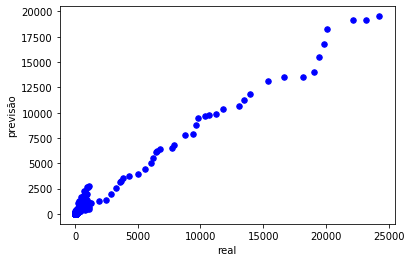

In [75]:
plt.scatter(df_casos_teste_lasso['real'], df_casos_teste_lasso['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [76]:
df_casos_teste_lasso.describe()

,real,previsão
count,8794.00000,8794.00000
mean,71.08847,70.82522
std,818.10473,695.04451
min,1.00000,0.00000
25%,1.00000,1.00000
50%,3.00000,3.00000
75%,13.00000,13.00000
max,24273.00000,19527.00000


Sem log1p
*  	real 	previsão
* count 	8794.00000 	8794.00000
* mean 	71.08847 	70.82522
* std 	818.10473 	695.04451
* min 	1.00000 	0.00000
* 25% 	1.00000 	1.00000
* 50% 	3.00000 	3.00000
* 75% 	13.00000 	13.00000
* max 	24273.00000 	19527.00000

In [77]:
df_casos_teste_lasso[df_casos_teste_lasso['previsão'] < 0]

,real,previsão
data,,


* sem casos negativos

In [78]:
erro_teste = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index <= dia]['real'].values,
                        df_casos_baseline_lasso[df_casos_baseline_lasso.index <= dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')
erro_teste['Gradient Boosting Sem Modificação da Distr. Target(laço)'] = check_erro(df_casos_teste_lasso['real'],
                                                                df_casos_teste_lasso['previsão'])

In [79]:
erro_teste

,Baseline,Gradient Boosting Sem Modificação da Distr. Target(laço)
Base Teste,,
VIÉS,4.54008,0.26325
MSE,2534.63900,24725.20184
RMSE,50.34520,157.24249
MAE,4.65810,17.04105
MAPE,11.77102,24.39874


sem log1p

*  	Baseline 	Gradient Boosting ScikitLearn (laço)
* Base Teste 		
* VIÉS 	4.54008 	0.26325
* MSE 	2534.63900 	24725.20184
* RMSE 	50.34520 	157.24249
* MAE 	4.65810 	17.04105
* MAPE 	11.77102 	24.39874

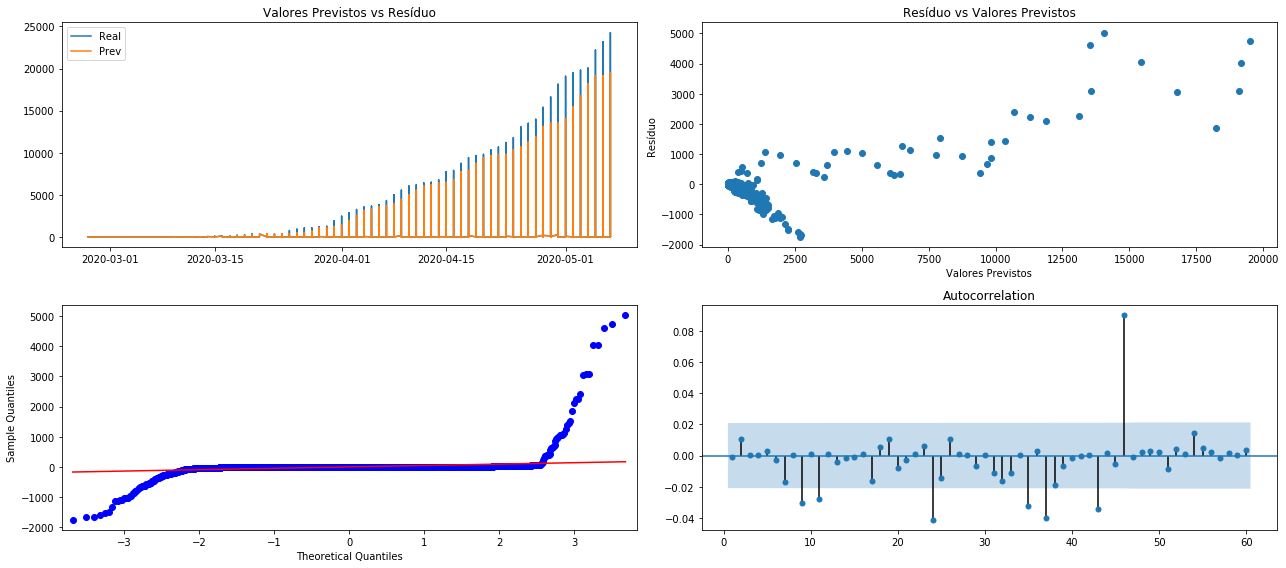

In [80]:
plotar_erro(df_casos_teste_lasso)

Conclusões:
* Com Gradient Boosting com GridSearch sem modificação da distribuição da target, o laço funcionou durante todos os 128 dias, com indicadores de erros aumentando gradativamente. Com a base teste, o Gradient Boosting com GridSearch resultado pior do que a Random Forest (5.67 de MAE contra 17.04). 

#### Com modificação da distribuição das targets

In [81]:
GB = GradientBoostingRegressor(random_state=14)

In [82]:
grid_GB = {'loss':['ls', 'lad', 'huber', 'quantile'],
           #'learning_rate':[0.1,0.5],
           'n_estimators':[100, 250, 500],
           'subsample':[1.0],
           'criterion' : ['mae'],           
           'min_samples_split' : [2],
           #'min_samples_leaf':[1, 10, 30, 50, 100, 500],
           #'min_weight_fraction_leaf':[0.0, 0.5, 1.0],
           #'max_depth':[3],           
           'min_impurity_decrease': [0.1,0.01,0.001],           
           #'init':[None],
           'random_state':[14],
           'max_features':["log2"],
           #'alpha':[0.9]
           'verbose':[0],
           #'max_leaf_nodes' : [None, 5, 10, 50, 100, 1000],
           #'warm_start':[True, False],
           #'validation_fraction':[0.1],
           #'n_iter_no_change':[None],
           #'tol':[1e-4],
           #'ccp_alpha':[0.0, 0.1,0.5,1.0],           
           }

In [83]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [84]:
xtr = expl_casos[explicativas['dia_do_ano'] < 128]
xts = expl_casos[explicativas['dia_do_ano'] == 128]
ytr, yts = target_casos_log[explicativas['dia_do_ano'] < 128].values, target_casos_log[explicativas['dia_do_ano'] == 128].values

In [85]:
grid_GB_treino = GridSearchCV(estimator=GB,
                                param_grid=grid_GB,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_GB_treino.fit(xtr, ytr)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 23.6min finished


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=14),
             param_grid={'criterion': ['mae'],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'max_features': ['log2'],
                         'min_impurity_decrease': [0.1, 0.01, 0.001],
                         'min_samples_split': [2],
                         'n_estimators': [100, 250, 500], 'random_state': [14],
                         'subsample': [1.0], 'verbose': [0]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [86]:
grid_GB_treino.best_params_

{'criterion': 'mae',
 'loss': 'huber',
 'max_features': 'log2',
 'min_impurity_decrease': 0.001,
 'min_samples_split': 2,
 'n_estimators': 500,
 'random_state': 14,
 'subsample': 1.0,
 'verbose': 0}

In [87]:
grid_GB_best = grid_GB_treino.best_estimator_

In [88]:
dia = 58
prev = {}
erro_teste = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['real'].values,
                        df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')

for dia in range(58,129):
    try:
        
        train = expl_casos[explicativas['dia_do_ano'] < dia]
        val = expl_casos[explicativas['dia_do_ano'] == dia]

        xtr, xts = train, val
        ytr, yts = target_casos_log[explicativas['dia_do_ano'] < dia].values, target_casos_log[explicativas['dia_do_ano'] == dia].values
        #ytr, yts = target_casos[explicativas['dia_do_ano'] < dia].values, target_casos[explicativas['dia_do_ano'] == dia].values

        #GB = DecisionTreeRegressor(criterion='mae', random_state=14)
        #GB.fit(xtr,ytr)
        
        grid_GB_best.fit(xtr,ytr)
        
        p = np.expm1(grid_GB_best.predict(xts))
        #p = np.expm1(GB.predict(xts))
        #p = GB.predict(xts)
        
        prev.update({dia: p.round(decimals=0)})


        erro_teste['Baseline'] = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['real'].values,
                                            df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['previsão'].values)

        erro_teste['Gradient Boosting ScikitLearn (laço)'] = check_erro(yts, p)


        print('Dia do ano {} - Viés {}, MSE {}, RMSE {}, MAE {}, MAPE {}'.format(dia,
                                                                                 erro_teste['Gradient Boosting ScikitLearn (laço)'].iloc[0],
                                                                                 erro_teste['Gradient Boosting ScikitLearn (laço)'].iloc[1],
                                                                                 erro_teste['Gradient Boosting ScikitLearn (laço)'].iloc[2],
                                                                                 erro_teste['Gradient Boosting ScikitLearn (laço)'].iloc[3],
                                                                                 erro_teste['Gradient Boosting ScikitLearn (laço)'].iloc[4]))
    except Exception as e:
    
        dia = dia - 1
        
       
        print("Erro no dia {}: {}".format(dia + 1, e))
        break

Dia do ano 58 - Viés -0.3068528194400547, MSE 0.09415865279831082, RMSE 0.3068528194400547, MAE 0.3068528194400547, MAPE 44.26950408889635
Dia do ano 59 - Viés -0.3068528194400547, MSE 0.09415865279831082, RMSE 0.3068528194400547, MAE 0.3068528194400547, MAPE 44.26950408889635
Dia do ano 60 - Viés -0.3068528194400547, MSE 0.09415865279831082, RMSE 0.3068528194400547, MAE 0.3068528194400547, MAPE 44.26950408889635
Dia do ano 61 - Viés -0.3068528194400547, MSE 0.09415865279831082, RMSE 0.3068528194400547, MAE 0.3068528194400547, MAPE 44.26950408889635
Dia do ano 62 - Viés 0.09861228866810978, MSE 0.009724383476362612, RMSE 0.09861228866810978, MAE 0.09861228866810978, MAPE 8.97607733731627
Dia do ano 63 - Viés -0.8860163147119795, MSE 0.7850249099357975, RMSE 0.8860163147119795, MAE 0.8860163147119795, MAPE 80.64868050821927
Dia do ano 64 - Viés -0.6055100627399266, MSE 0.3666424360793098, RMSE 0.6055100627399266, MAE 0.6055100627399266, MAPE 43.67831823616286
Dia do ano 65 - Viés -1.023

Dia do ano 119 - Viés -42.84324193536056, MSE 103563.07299010956, RMSE 321.81217035735233, MAE 42.870842396635254, MAPE 743.4207998537642
Dia do ano 120 - Viés -44.652795152452185, MSE 105497.5611942693, RMSE 324.80388112562525, MAE 44.66754754578465, MAPE 770.9622677754528
Dia do ano 121 - Viés -47.25437749388542, MSE 112021.65147916727, RMSE 334.69635713459337, MAE 47.25811133406853, MAPE 806.7668636983417
Dia do ano 122 - Viés -47.54713903311704, MSE 104741.87014408811, RMSE 323.6384868091064, MAE 47.55746372731497, MAPE 820.9326800775061
Dia do ano 123 - Viés -50.253113008869136, MSE 118711.83525959878, RMSE 344.54583912681164, MAE 50.253113008869136, MAPE 866.1196130391498
Dia do ano 124 - Viés -54.770172307015876, MSE 132842.5935404398, RMSE 364.4757790861277, MAE 54.770172307015876, MAPE 941.221391597632
Dia do ano 125 - Viés -52.63900663670938, MSE 111667.30160955776, RMSE 334.16657763689915, MAE 52.63990030372946, MAPE 925.9032868361976
Dia do ano 126 - Viés -54.13408532487667

* Com modificação das targets, a Gradient Boosting conseguiu prever os 128 dias.

In [89]:
dt = []
pt = []
for k, i in prev.items():
    for a in i:
        dt.append(k)
        pt.append(a)        

In [90]:
dt = pd.DataFrame(data=dt, columns=['dia_do_ano'])
pt = pd.DataFrame(data=pt, columns=['previsão'])
y_pred1 = pd.concat([dt,pt], axis=1, join='inner')

In [91]:
proc_data = dados_tratados[['dia_do_ano', 'data']].copy()
proc_data.drop_duplicates(inplace=True)

In [92]:
y_pred1 = pd.merge(y_pred1, proc_data, how='left',
        left_on='dia_do_ano', right_on='dia_do_ano')
y_pred1 = y_pred1.loc[y_pred1['dia_do_ano'] <= dia].drop(columns='dia_do_ano').set_index('data')
y_pred1 = y_pred1.astype('int64')

In [93]:
df_casos_teste_lasso = dados_tratados[['data', 'casos_acumulados']][dados_tratados['dia_do_ano'] <= dia].copy()
df_casos_teste_lasso.drop([0], inplace=True)
df_casos_teste_lasso.set_index('data', inplace=True)
df_casos_teste_lasso = pd.concat([df_casos_teste_lasso,y_pred1], axis=1, join='inner')
colunas = {'casos_acumulados': 'real'}
df_casos_teste_lasso.rename(columns=colunas, inplace=True)
df_casos_teste_lasso

,real,previsão
data,,
2020-02-27,1,1
2020-02-28,1,1
2020-02-29,1,1
2020-03-01,1,1
2020-03-02,2,1
...,...,...
2020-05-07,2,2
2020-05-07,36,21
2020-05-07,10,11


Text(0, 0.5, 'previsão')

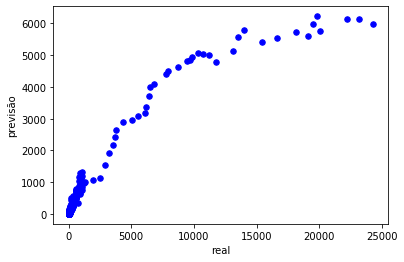

In [94]:
plt.scatter(df_casos_teste_lasso['real'], df_casos_teste_lasso['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [95]:
df_casos_teste_lasso.describe()

,real,previsão
count,8794.00000,8794.00000
mean,71.08847,43.44030
std,818.10473,307.46801
min,1.00000,1.00000
25%,1.00000,1.00000
50%,3.00000,3.00000
75%,13.00000,12.00000
max,24273.00000,6227.00000


Com log1p
*  	real 	previsão
* count 	8794.00000 	8794.00000
* mean 	71.08847 	43.44030
* std 	818.10473 	307.46801
* min 	1.00000 	1.00000
* 25% 	1.00000 	1.00000
* 50% 	3.00000 	3.00000
* 75% 	13.00000 	12.00000
* max 	24273.00000 	6227.00000

In [96]:
df_casos_teste_lasso[df_casos_teste_lasso['previsão'] < 0]

,real,previsão
data,,


* sem casos negativos

In [97]:
erro_teste = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index <= dia]['real'].values,
                        df_casos_baseline_lasso[df_casos_baseline_lasso.index <= dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')
erro_teste['Gradient Boosting Com Modificação da Distr. Target (laço)'] = check_erro(df_casos_teste_lasso['real'],
                                                                df_casos_teste_lasso['previsão'])

In [98]:
erro_teste

,Baseline,Gradient Boosting Com Modificação da Distr. Target (laço)
Base Teste,,
VIÉS,4.54008,27.64817
MSE,2534.63900,287254.15238
RMSE,50.34520,535.96096
MAE,4.65810,31.64999
MAPE,11.77102,15.56567


Com log1p:
*  	Baseline 	Gradient Boosting ScikitLearn (laço)
* Base Teste 		
* VIÉS 	4.54008 	27.64817
* MSE 	2534.63900 	287254.15238
* RMSE 	50.34520 	535.96096
* MAE 	4.65810 	31.64999
* MAPE 	11.77102 	15.56567

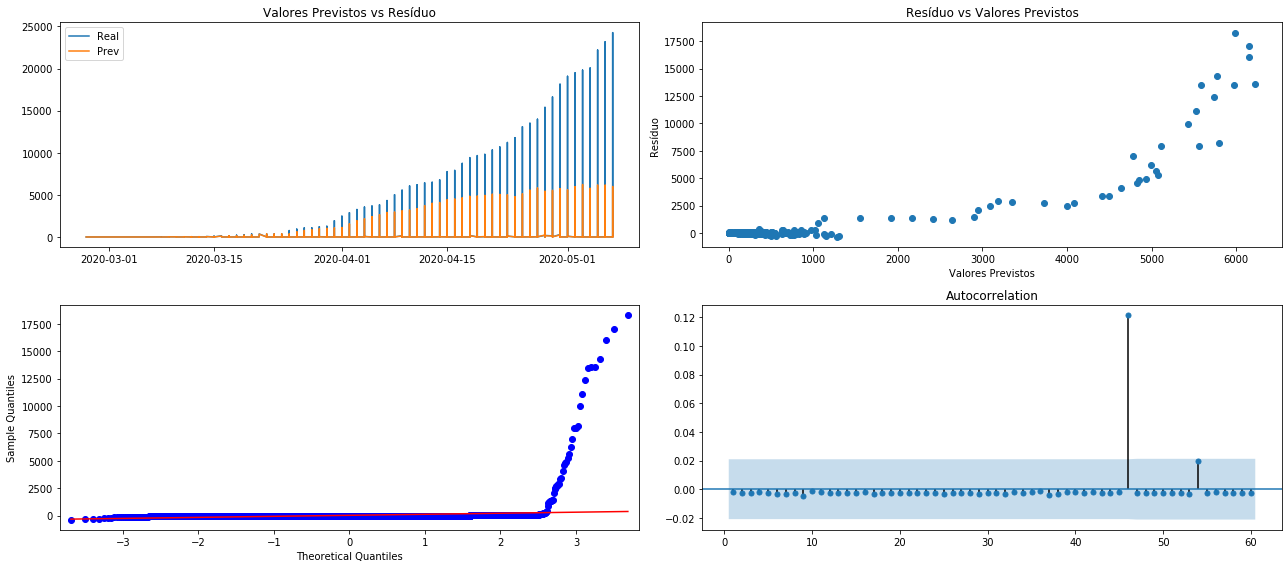

In [99]:
plotar_erro(df_casos_teste_lasso)

Conclusões:
* Com Gradient Boosting com GridSearch e modificação da distribuição da target, o laço funcionou durante todos os 128 dias, com indicadores de erros aumentando gradativamente. O desempenho foi pior do que com a base sem modificação da distribuição da target.

#### 2.1.1.2. Mortes Acumuladas

In [100]:
expl_mortes = explicativas[varmortes]

In [101]:
expl_mortes

,mortes_acumuladas_menos8d,mortes_acumuladas_menos1d,mortes_acumuladas_menos9d,mortes_acumuladas_menos7d,mortes_acumuladas_menos6d,mortes_acumuladas_menos5d,mortes_acumuladas_menos4d,mortes_acumuladas_menos3d,mortes_acumuladas_menos2d,mortes_acumuladas_menos14d,mortes_acumuladas_menos13d,mortes_acumuladas_menos12d,mortes_acumuladas_menos11d,mortes_acumuladas_menos10d,casos_acumulados_menos9d,casos_acumulados_menos8d,casos_acumulados_menos7d,casos_acumulados_menos6d,casos_acumulados_menos5d,casos_acumulados_menos4d,casos_acumulados_menos3d,casos_acumulados_menos2d,casos_acumulados_menos1d,casos_acumulados_menos14d,casos_acumulados_menos13d,casos_acumulados_menos12d,casos_acumulados_menos11d,casos_acumulados_menos10d,índice_isolamento,zona geográfica_Tropical,papel_Metropolitana,papel_Interior,mês,litoral_S,idhm_2010,habitantes,faixa_pop_Maior de 50 mil,faixa_pop_Maior de 100 mil,faixa meridional_meridiano 50 a 60,dias_epidemiológicos,dia_do_ano,capital_S,Outras_Especialidades_SUS,Clínicos_SUS,Clínicos_Não_SUS,Cirúrgicos_SUS,Cirúrgicos_Não_SUS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53000,0,0,0,2,0,0.80500,12252023,0,1,0,1,57,1,2805,3983,5331,4279,4777
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.53000,0,0,0,2,0,0.80500,12252023,0,1,0,2,58,1,2805,3983,5331,4279,4777
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.53000,0,0,0,2,0,0.80500,12252023,0,1,0,3,59,1,2805,3983,5331,4279,4777
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0.53000,0,0,0,2,0,0.80500,12252023,0,1,0,4,60,1,2805,3983,5331,4279,4777
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0.53000,0,0,0,3,0,0.80500,12252023,0,1,0,5,61,1,2805,5921,5258,4279,4611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,1,1,1,1,1,0.53000,1,0,1,5,0,0.73200,6638,0,0,1,18,128,0,0,0,0,0,0
8791,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,17,24,26,26,26,28,27,1,1,1,1,1,0.53000,1,0,1,5,0,0.75500,35653,0,0,0,40,128,0,0,36,4,20,12
8792,2,2,2,2,2,2,2,2,2,2,2,2,2,2,9,9,9,10,10,10,10,10,10,9,9,9,9,9,0.53000,1,0,1,5,0,0.68500,6357,0,0,0,21,128,0,0,5,0,3,0
8793,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,4,4,4,4,4,4,4,4,2,2,2,2,3,0.53000,1,0,1,5,0,0.74500,18705,0,0,0,36,128,0,0,15,7,3,1


In [102]:
df_mortes_baseline_lasso = dados_tratados[['dia_do_ano', 'mortes_acumuladas', 'mortes_acumuladas_menos1d']].copy()

In [103]:
df_mortes_baseline_lasso.set_index('dia_do_ano', inplace=True)
colunas = {'mortes_acumuladas': 'real', 'mortes_acumuladas_menos1d': 'previsão'}
df_mortes_baseline_lasso.rename(columns=colunas, inplace=True)
df_mortes_baseline_lasso

,real,previsão
dia_do_ano,,
57,0,0
58,0,0
59,0,0
60,0,0
61,0,0
...,...,...
128,0,0
128,0,0
128,2,2


#### Sem modificação da distribuição das targets

In [104]:
GB = GradientBoostingRegressor(random_state=14)

In [105]:
grid_GB = {'loss':['ls', 'lad', 'huber', 'quantile'],
           #'learning_rate':[0.1,0.5],
           'n_estimators':[100, 250, 500],
           'subsample':[1.0],
           'criterion' : ['mae'],           
           'min_samples_split' : [2],
           #'min_samples_leaf':[1, 10, 30, 50, 100, 500],
           #'min_weight_fraction_leaf':[0.0, 0.5, 1.0],
           #'max_depth':[3],           
           'min_impurity_decrease': [0.1,0.01,0.001],           
           #'init':[None],
           'random_state':[14],
           'max_features':["log2"],
           #'alpha':[0.9]
           'verbose':[0],
           #'max_leaf_nodes' : [None, 5, 10, 50, 100, 1000],
           #'warm_start':[True, False],
           #'validation_fraction':[0.1],
           #'n_iter_no_change':[None],
           #'tol':[1e-4],
           #'ccp_alpha':[0.0, 0.1,0.5,1.0],           
           }

In [106]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [107]:
xtr = expl_mortes[explicativas['dia_do_ano'] < 128]
xts = expl_mortes[explicativas['dia_do_ano'] == 128]
ytr, yts = target_mortes[explicativas['dia_do_ano'] < 128].values, target_mortes[explicativas['dia_do_ano'] == 128].values

In [108]:
grid_GB_treino = GridSearchCV(estimator=GB,
                                param_grid=grid_GB,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_GB_treino.fit(xtr, ytr)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 22.0min finished


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=14),
             param_grid={'criterion': ['mae'],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'max_features': ['log2'],
                         'min_impurity_decrease': [0.1, 0.01, 0.001],
                         'min_samples_split': [2],
                         'n_estimators': [100, 250, 500], 'random_state': [14],
                         'subsample': [1.0], 'verbose': [0]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [109]:
grid_GB_treino.best_params_

{'criterion': 'mae',
 'loss': 'ls',
 'max_features': 'log2',
 'min_impurity_decrease': 0.001,
 'min_samples_split': 2,
 'n_estimators': 500,
 'random_state': 14,
 'subsample': 1.0,
 'verbose': 0}

In [110]:
grid_GB_best = grid_GB_treino.best_estimator_

In [111]:
dia = 58
prev = {}
erro_teste = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['real'].values,
                        df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')

for dia in range(58,129):
    try:
        
        train = expl_mortes[explicativas['dia_do_ano'] < dia]
        val = expl_mortes[explicativas['dia_do_ano'] == dia]

        xtr, xts = train, val
        #ytr, yts = target_mortes_log[explicativas['dia_do_ano'] < dia].values, target_mortes_log[explicativas['dia_do_ano'] == dia].values
        ytr, yts = target_mortes[explicativas['dia_do_ano'] < dia].values, target_mortes[explicativas['dia_do_ano'] == dia].values

        #GB = DecisionTreeRegressor(criterion='mae', random_state=14)
        #GB.fit(xtr,ytr)
        grid_GB_best.fit(xtr,ytr)

        #p = np.expm1(GB.predict(xts))
        #p = GB.predict(xts)
        p = grid_GB_best.predict(xts)
      
        prev.update({dia: p.round(decimals=0)})

        
        erro_teste['Baseline'] = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['real'].values,
                                            df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['previsão'].values)

        erro_teste['Gradient Boosting ScikitLearn (laço)'] = check_erro(yts, p)


        print('Dia do ano {} - Viés {}, MSE {}, RMSE {}, MAE {}, MAPE {}'.format(dia,
                                                                                 erro_teste['Gradient Boosting ScikitLearn (laço)'].iloc[0],
                                                                                 erro_teste['Gradient Boosting ScikitLearn (laço)'].iloc[1],
                                                                                 erro_teste['Gradient Boosting ScikitLearn (laço)'].iloc[2],
                                                                                 erro_teste['Gradient Boosting ScikitLearn (laço)'].iloc[3],
                                                                                 erro_teste['Gradient Boosting ScikitLearn (laço)'].iloc[4]))
    except Exception as e:
    
        dia = dia - 1
        
                
        print("Erro no dia {}: {}".format(dia + 1, e))
        break

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 58 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 59 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 60 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 61 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 62 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 63 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 64 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 65 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 66 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 67 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 68 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 69 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 70 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 71 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 72 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 73 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 74 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 75 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 76 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 77 - Viés 0.125, MSE 0.125, RMSE 0.3535533905932738, MAE 0.125, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 78 - Viés 0.06544383043577885, MSE 0.0685263190737116, RMSE 0.2617753217431154, MAE 0.06544383043577885, MAPE inf
Dia do ano 79 - Viés 0.1801224330729213, MSE 0.5515495452338532, RMSE 0.7426638171029024, MAE 0.1801224330729213, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 80 - Viés 0.20396261444592373, MSE 0.8320149618323306, RMSE 0.9121485415393321, MAE 0.20396261444592373, MAPE inf
Dia do ano 81 - Viés 0.2652312479836404, MSE 1.6179951428600652, RMSE 1.2720043800475158, MAE 0.2652312479836404, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 82 - Viés 0.30935596956483363, MSE 2.2011256658241605, RMSE 1.4836191107639995, MAE 0.30935596956483363, MAPE inf
Dia do ano 83 - Viés 0.3538705726901497, MSE 2.8801607909692546, RMSE 1.6971036476801453, MAE 0.3538705726901497, MAPE inf

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 84 - Viés 0.706259045115782, MSE 10.146880724088257, RMSE 3.1854168838769374, MAE 0.706259045115782, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 85 - Viés 0.029364847501086245, MSE 0.018916915911055723, RMSE 0.13753877966252182, MAE 0.029364847501086245, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 86 - Viés 0.34586090136330144, MSE 2.388256067001725, RMSE 1.5453983522062282, MAE 0.34586090136330144, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 87 - Viés 0.285445322056963, MSE 2.3455168438492495, RMSE 1.5315080293126933, MAE 0.3333850360923352, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 88 - Viés 0.4465237797357855, MSE 6.975220036009758, RMSE 2.6410641862722226, MAE 0.46039833755331006, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 89 - Viés 0.308687318883815, MSE 3.7818039502325775, RMSE 1.9446860801251644, MAE 0.321635010999023, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 90 - Viés 0.23523400281411505, MSE 2.8450288371422308, RMSE 1.6867213276478812, MAE 0.3657444656967468, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 91 - Viés 0.3247967856347969, MSE 5.4989490409516675, RMSE 2.3449838039849373, MAE 0.4304543546018607, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 92 - Viés 0.38736638364900533, MSE 7.656801854792223, RMSE 2.767092671883655, MAE 0.4585450844843052, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 93 - Viés 0.24037436022596156, MSE 5.9453279273230715, RMSE 2.4383043139286515, MAE 0.4517125268593555, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 94 - Viés 0.3191800445008722, MSE 6.0150533149321195, RMSE 2.4525605629488783, MAE 0.42965577922982345, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 95 - Viés 0.36935334764663, MSE 7.643619511445107, RMSE 2.764709661328854, MAE 0.47863317712688547, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 96 - Viés 0.17495308084763353, MSE 1.0017865164237623, RMSE 1.000892859612737, MAE 0.2840068317781534, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 97 - Viés 0.2138295550342002, MSE 6.209758372811776, RMSE 2.4919386775785184, MAE 0.4346258034833869, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 98 - Viés 0.4852303205172801, MSE 23.953841807126796, RMSE 4.894266217435132, MAE 0.6797098512321942, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 99 - Viés 0.21609985023157138, MSE 15.816438058737292, RMSE 3.9769885665836773, MAE 0.6529315331064879, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 100 - Viés 0.22954766563635903, MSE 17.150584408172666, RMSE 4.141326406862017, MAE 0.6941034792017906, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 101 - Viés 0.036122650734584184, MSE 7.559711047230381, RMSE 2.749492870918268, MAE 0.5971025554763657, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 102 - Viés -0.189785460042012, MSE 4.891677887534847, RMSE 2.21171378969677, MAE 0.47613932131410885, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 103 - Viés -0.22672784784556352, MSE 8.454733221087217, RMSE 2.9077023955500017, MAE 0.6153510837100922, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 104 - Viés -0.19366072107322338, MSE 3.499289898809059, RMSE 1.8706389012337628, MAE 0.455314746887571, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 105 - Viés 0.27908833804197486, MSE 19.24143817326064, RMSE 4.386506374469396, MAE 0.6318847655027798, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 106 - Viés 0.26633734762970873, MSE 12.850593113818126, RMSE 3.5847723935862548, MAE 0.5978526474086734, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 107 - Viés 0.26203512141753854, MSE 11.923744058885738, RMSE 3.453077476525214, MAE 0.5335738334638752, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 108 - Viés 0.2909902747601238, MSE 9.528210917138527, RMSE 3.086780024092829, MAE 0.533707676755563, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 109 - Viés 0.3005667221636536, MSE 9.735103925375203, RMSE 3.120112806514406, MAE 0.4328250975139495, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 110 - Viés -0.0016816690084032714, MSE 2.1921057716078707, RMSE 1.4805761620422877, MAE 0.357860245817248, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 111 - Viés -0.2030631880610489, MSE 5.310847326297966, RMSE 2.3045275711733124, MAE 0.4402028706147257, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 112 - Viés 0.0004717299162907788, MSE 9.992895845336859, RMSE 3.1611541951219113, MAE 0.509432220655959, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 113 - Viés 0.08946773948150684, MSE 3.7937249124903585, RMSE 1.9477486779588271, MAE 0.33734956286386164, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 114 - Viés 0.7298109350682854, MSE 74.9139310248092, RMSE 8.65528341678129, MAE 0.8994192811912068, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 115 - Viés 0.6009264002014131, MSE 40.53127863479794, RMSE 6.366418038017763, MAE 0.8238726611106237, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 116 - Viés 0.4636012184826083, MSE 32.213461569606146, RMSE 5.675690404664982, MAE 0.7719172201265898, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 117 - Viés 0.01737714208529563, MSE 2.782814100332358, RMSE 1.6681768792104625, MAE 0.383865251487456, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 118 - Viés 0.23122008082615036, MSE 15.459920557403905, RMSE 3.9319105479911296, MAE 0.6104536791964794, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 119 - Viés 0.6056794910820514, MSE 80.55701030879793, RMSE 8.975355720460216, MAE 0.9199918721693187, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 120 - Viés 0.4863975021784549, MSE 51.26588819789395, RMSE 7.160020125522969, MAE 0.8281748065524956, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 121 - Viés 0.18607710208806122, MSE 26.408431405147024, RMSE 5.138913445967642, MAE 0.7060992042417125, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 122 - Viés 0.14530147969976842, MSE 27.25029626041814, RMSE 5.220181630979725, MAE 0.7031503131420811, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 123 - Viés -0.012131143813361393, MSE 13.143749212086304, RMSE 3.6254309001946656, MAE 0.5440481675157435, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 124 - Viés -0.2821417004231206, MSE 7.955169869718978, RMSE 2.8204910688954463, MAE 0.5383814526892197, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 125 - Viés -0.2100149429907735, MSE 2.977785406493665, RMSE 1.7256260911604417, MAE 0.43810762281400645, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 126 - Viés 0.77266307763724, MSE 173.7567524869687, RMSE 13.181682460405755, MAE 1.2227154234403221, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 127 - Viés -0.20103597178086274, MSE 2.0830047814958803, RMSE 1.443261854791389, MAE 0.37705036552548443, MAPE inf
Dia do ano 128 - Viés 0.015737002101119106, MSE 19.612694773747847, RMSE 4.428622220707909, MAE 0.6322053396582529, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


* Sem modificação das targets, a Gradient Boosting conseguiu prever os 128 dias.

In [112]:
dt = []
pt = []
for k, i in prev.items():
    for a in i:
        dt.append(k)
        pt.append(a)        

In [113]:
dt = pd.DataFrame(data=dt, columns=['dia_do_ano'])
pt = pd.DataFrame(data=pt, columns=['previsão'])
y_pred2 = pd.concat([dt,pt], axis=1, join='inner')

In [114]:
proc_data = dados_tratados[['dia_do_ano', 'data']].copy()
proc_data.drop_duplicates(inplace=True)

In [115]:
y_pred2 = pd.merge(y_pred2, proc_data, how='left',
        left_on='dia_do_ano', right_on='dia_do_ano')
y_pred2 = y_pred2.loc[y_pred2['dia_do_ano'] <= dia].drop(columns='dia_do_ano').set_index('data')
y_pred2 = y_pred2.astype('int64')

In [116]:
df_mortes_teste_lasso = dados_tratados[['data', 'mortes_acumuladas']][dados_tratados['dia_do_ano'] <= dia].copy()
df_mortes_teste_lasso.drop([0], inplace=True)
df_mortes_teste_lasso.set_index('data', inplace=True)
df_mortes_teste_lasso = pd.concat([df_mortes_teste_lasso,y_pred2], axis=1, join='inner')
colunas = {'mortes_acumuladas': 'real'}
df_mortes_teste_lasso.rename(columns=colunas, inplace=True)
df_mortes_teste_lasso

,real,previsão
data,,
2020-02-27,0,0
2020-02-28,0,0
2020-02-29,0,0
2020-03-01,0,0
2020-03-02,0,0
...,...,...
2020-05-07,0,0
2020-05-07,0,0
2020-05-07,2,2


Text(0, 0.5, 'previsão')

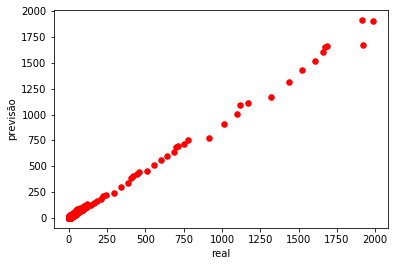

In [117]:
plt.scatter(df_mortes_teste_lasso['real'], df_mortes_teste_lasso['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [118]:
df_mortes_teste_lasso.describe()

,real,previsão
count,8794.00000,8794.00000
mean,5.53411,5.34478
std,67.05556,63.46643
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,1.00000,1.00000
max,1986.00000,1912.00000


Sem log1p:

* 	real 	previsão
* count 	8794.00000 	8794.00000
* mean 	5.53411 	5.34478
* std 	67.05556 	63.46643
* min 	0.00000 	0.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	1.00000 	1.00000
* max 	1986.00000 	1912.00000

In [119]:
df_mortes_teste_lasso[df_mortes_teste_lasso['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [120]:
erro_teste = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index <= dia]['real'].values,
                        df_mortes_baseline_lasso[df_mortes_baseline_lasso.index <= dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')
erro_teste['Gradient Boosting Sem Modificação da Distr. Target (laço)'] = check_erro(df_mortes_teste_lasso['real'],
                                                                df_mortes_teste_lasso['previsão'])

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [121]:
erro_teste

,Baseline,Gradient Boosting Sem Modificação da Distr. Target (laço)
Base Teste,,
VIÉS,0.36453,0.18933
MSE,21.03945,24.07767
RMSE,4.58688,4.90690
MAE,0.38204,0.55890
MAPE,nan,inf


Sem log1p:
* Baseline 	Regressão Linear ScikitLearn (lasso)
* Base Teste 		
* VIÉS 	0.36453 	0.18933
* MSE 	21.03945 	24.07767
* RMSE 	4.58688 	4.90690
* MAE 	0.38204 	0.55890
* MAPE 	nan 	inf

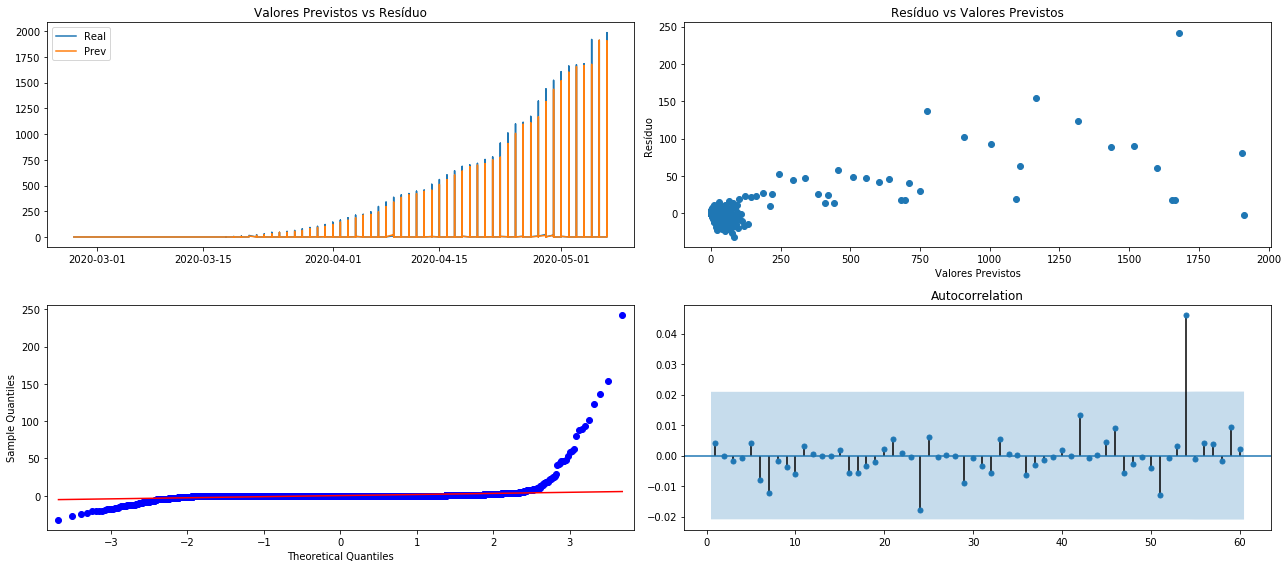

In [122]:
plotar_erro(df_mortes_teste_lasso)

Com Gradient Boosting e GridSearch sem modificação da distribuição da target, o laço funcionou durante todos os 128 dias, com indicadores de erros aumentando gradativamente.
Com a base teste, o Gradient Boosting com GridSearch teve desempenho pouco pior que a baseline, mas melhor que a Random Forest com GridSearch. O erro médio absoluto foi de 0.55 mortes (contra 0.56 da Random Forest), contra 0.38 mortes na baseline (que apenas repete o resultado do dia anterior). 

#### Com modificação da distribuição das targets

In [123]:
GB = GradientBoostingRegressor(random_state=14)

In [124]:
grid_GB = {'loss':['ls', 'lad', 'huber', 'quantile'],
           #'learning_rate':[0.1,0.5],
           'n_estimators':[100, 250, 500],
           'subsample':[1.0],
           'criterion' : ['mae'],           
           'min_samples_split' : [2],
           #'min_samples_leaf':[1, 10, 30, 50, 100, 500],
           #'min_weight_fraction_leaf':[0.0, 0.5, 1.0],
           #'max_depth':[3],           
           'min_impurity_decrease': [0.1,0.01,0.001],           
           #'init':[None],
           'random_state':[14],
           'max_features':["log2"],
           #'alpha':[0.9]
           'verbose':[0],
           #'max_leaf_nodes' : [None, 5, 10, 50, 100, 1000],
           #'warm_start':[True, False],
           #'validation_fraction':[0.1],
           #'n_iter_no_change':[None],
           #'tol':[1e-4],
           #'ccp_alpha':[0.0, 0.1,0.5,1.0],           
           }

In [125]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [126]:
xtr = expl_mortes[explicativas['dia_do_ano'] < 128]
xts = expl_mortes[explicativas['dia_do_ano'] == 128]
ytr, yts = target_mortes_log[explicativas['dia_do_ano'] < 128].values, target_mortes_log[explicativas['dia_do_ano'] == 128].values

In [127]:
grid_GB_treino = GridSearchCV(estimator=GB,
                                param_grid=grid_GB,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_GB_treino.fit(xtr, ytr)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 18.9min finished


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=14),
             param_grid={'criterion': ['mae'],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'max_features': ['log2'],
                         'min_impurity_decrease': [0.1, 0.01, 0.001],
                         'min_samples_split': [2],
                         'n_estimators': [100, 250, 500], 'random_state': [14],
                         'subsample': [1.0], 'verbose': [0]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [128]:
grid_GB_treino.best_params_

{'criterion': 'mae',
 'loss': 'ls',
 'max_features': 'log2',
 'min_impurity_decrease': 0.001,
 'min_samples_split': 2,
 'n_estimators': 500,
 'random_state': 14,
 'subsample': 1.0,
 'verbose': 0}

In [129]:
grid_GB_best = grid_GB_treino.best_estimator_

In [130]:
dia = 58
prev = {}
erro_teste = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['real'].values,
                        df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')

for dia in range(58,129):
    try:
        
        train = expl_mortes[explicativas['dia_do_ano'] < dia]
        val = expl_mortes[explicativas['dia_do_ano'] == dia]

        xtr, xts = train, val
        ytr, yts = target_mortes_log[explicativas['dia_do_ano'] < dia].values, target_mortes_log[explicativas['dia_do_ano'] == dia].values
        #ytr, yts = target_mortes[explicativas['dia_do_ano'] < dia].values, target_mortes[explicativas['dia_do_ano'] == dia].values

        #GB = DecisionTreeRegressor(criterion='mae', random_state=14)
        #GB.fit(xtr,ytr)
        grid_GB_best.fit(xtr, ytr)

        #p = np.expm1(GB.predict(xts))
        #p = GB.predict(xts)
        p=np.expm1(grid_GB_best.predict(xts))
      
        prev.update({dia: p.round(decimals=0)})

        
        erro_teste['Baseline'] = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['real'].values,
                                            df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['previsão'].values)

        erro_teste['Gradient Boosting ScikitLearn (laço)'] = check_erro(yts, p)


        print('Dia do ano {} - Viés {}, MSE {}, RMSE {}, MAE {}, MAPE {}'.format(dia,
                                                                                 erro_teste['Gradient Boosting ScikitLearn (laço)'].iloc[0],
                                                                                 erro_teste['Gradient Boosting ScikitLearn (laço)'].iloc[1],
                                                                                 erro_teste['Gradient Boosting ScikitLearn (laço)'].iloc[2],
                                                                                 erro_teste['Gradient Boosting ScikitLearn (laço)'].iloc[3],
                                                                                 erro_teste['Gradient Boosting ScikitLearn (laço)'].iloc[4]))
    except Exception as e:
    
        dia = dia - 1
        
                
        print("Erro no dia {}: {}".format(dia + 1, e))
        break

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 58 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 59 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 60 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 61 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 62 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 63 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 64 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 65 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 66 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 67 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 68 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 69 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 70 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 71 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 72 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 73 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 74 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 75 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 76 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 77 - Viés 0.08664339756999316, MSE 0.060056626739775174, RMSE 0.24506453586713678, MAE 0.08664339756999316, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 78 - Viés 0.012231156307480479, MSE 0.002393618953888312, RMSE 0.048924625229921914, MAE 0.012231156307480479, MAPE inf
Dia do ano 79 - Viés -0.0021173249843013157, MSE 7.621210651549164e-05, RMSE 0.00872995455403358, MAE 0.0021173249843013157, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 80 - Viés -0.11146905194569401, MSE 0.24850699083343658, RMSE 0.498504755076054, MAE 0.11146905194569401, MAPE inf
Dia do ano 81 - Viés -0.23029795718204496, MSE 1.2198544288911293, RMSE 1.104470202808174, MAE 0.23029795718204496, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 82 - Viés -0.43560060518609983, MSE 4.364201406485418, RMSE 2.0890671139255956, MAE 0.43560060518609983, MAPE inf
Dia do ano 83 - Viés -0.678084947421526, MSE 10.575381506152036, RMSE 3.2519811663280027, MAE 0.678084947421526, MAPE inf

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.



Dia do ano 84 - Viés -0.8631723064836514, MSE 18.374917329749593, RMSE 4.286597407005887, MAE 0.9234459743584291, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 85 - Viés -1.0558163856066594, MSE 35.937557296874246, RMSE 5.994794183028659, MAE 1.0971799503972883, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 86 - Viés -0.9510456055501469, MSE 36.91648076499832, RMSE 6.0758934129063125, MAE 1.0731429615189327, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 87 - Viés -1.0023638348752513, MSE 39.29806086656352, RMSE 6.268816544337816, MAE 1.06418606636749, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 88 - Viés -1.20724645473538, MSE 52.33973605782726, RMSE 7.234620657493195, MAE 1.20724645473538, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 89 - Viés -1.1958931029594155, MSE 64.89102404507474, RMSE 8.055496511393617, MAE 1.225388727664094, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 90 - Viés -1.2727248309289847, MSE 79.33065783459291, RMSE 8.906775950622812, MAE 1.3594657732953572, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 91 - Viés -1.0562055102986472, MSE 75.69218960175195, RMSE 8.700125838271074, MAE 1.1654731538950445, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 92 - Viés -1.175836644389931, MSE 97.12786307737007, RMSE 9.85534692831105, MAE 1.2545597239944062, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 93 - Viés -1.3196051525518295, MSE 123.62801650737244, RMSE 11.118813628592415, MAE 1.4008390095649281, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 94 - Viés -1.231365812484284, MSE 120.41853402852178, RMSE 10.973537899352323, MAE 1.3340355906293586, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 95 - Viés -1.2906178636688819, MSE 145.38175264145755, RMSE 12.057435574841673, MAE 1.4087475416894504, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 96 - Viés -1.5553165595617902, MSE 192.41868402396156, RMSE 13.871506191613136, MAE 1.6159211295398517, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 97 - Viés -1.6024918780925321, MSE 209.5811630556501, RMSE 14.476918285866303, MAE 1.631444638947009, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 98 - Viés -1.5232472629013245, MSE 208.04359708142886, RMSE 14.423716479514871, MAE 1.6086003001763218, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 99 - Viés -1.5548008974302243, MSE 211.66620035611524, RMSE 14.548752536080721, MAE 1.6336498872465357, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 100 - Viés -1.5806764170635186, MSE 229.15419307859213, RMSE 15.137839775826409, MAE 1.6615614285782219, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 101 - Viés -1.7198960961323138, MSE 278.00266948985507, RMSE 16.673412053021874, MAE 1.7888970278244352, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 102 - Viés -1.996481359411364, MSE 330.93723167049484, RMSE 18.191680287166847, MAE 2.018709246863263, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 103 - Viés -2.173402637168704, MSE 420.4477350910898, RMSE 20.50482223992907, MAE 2.190787548472203, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 104 - Viés -2.2189900007541783, MSE 439.9004255764911, RMSE 20.973803316911578, MAE 2.2398501163238493, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 105 - Viés -2.139070602721419, MSE 455.35226720604624, RMSE 21.33898468076788, MAE 2.187511352276343, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 106 - Viés -2.0550798549351605, MSE 457.6288807058764, RMSE 21.392262168968394, MAE 2.1061445541320856, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 107 - Viés -2.0702697400301053, MSE 465.28968723416824, RMSE 21.57057456893924, MAE 2.1078737549810453, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 108 - Viés -2.0065634872005615, MSE 441.3819095740198, RMSE 21.009091117276345, MAE 2.0754420388402663, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 109 - Viés -2.231654931018548, MSE 483.02503017652043, RMSE 21.97783042469207, MAE 2.2516200663745876, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 110 - Viés -2.3727132032431366, MSE 490.20127950837474, RMSE 22.14048959504678, MAE 2.396523810146539, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 111 - Viés -2.5760748692935307, MSE 502.71549235578624, RMSE 22.42131781041842, MAE 2.584190653015238, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 112 - Viés -2.6659502629240133, MSE 606.0504490811488, RMSE 24.618091905774275, MAE 2.6824687984536073, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 113 - Viés -2.6261520224058565, MSE 638.2874394372525, RMSE 25.264351158049806, MAE 2.6537769087114325, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 114 - Viés -2.537771567153457, MSE 674.3888013010096, RMSE 25.968996925199278, MAE 2.630947730748897, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 115 - Viés -2.618776645289169, MSE 662.5669046638554, RMSE 25.74037499073888, MAE 2.708517131557501, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 116 - Viés -2.7295356169156224, MSE 757.138562567609, RMSE 27.516150940267956, MAE 2.786564378088826, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 117 - Viés -3.0491879385558724, MSE 742.1224472282753, RMSE 27.241924440616806, MAE 3.0634938453765024, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 118 - Viés -3.1181303447388475, MSE 792.9305704797698, RMSE 28.159022896396277, MAE 3.1417236866872242, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 119 - Viés -3.169241505103449, MSE 836.7577200999394, RMSE 28.92676477070914, MAE 3.221914823736944, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 120 - Viés -3.4550102556514637, MSE 878.2635653702588, RMSE 29.635511896544976, MAE 3.4870086763300914, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 121 - Viés -3.3701178249732244, MSE 878.1397595798983, RMSE 29.6334230148982, MAE 3.392811963116, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 122 - Viés -3.4847247417822254, MSE 875.6116561038998, RMSE 29.590735984491833, MAE 3.5022957840356606, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 123 - Viés -3.7374616403703036, MSE 932.9720631022841, RMSE 30.544591388694073, MAE 3.7410949077079403, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 124 - Viés -3.965290128204816, MSE 1175.4843869194417, RMSE 34.28533778336509, MAE 3.979945047750456, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 125 - Viés -4.147350012963276, MSE 1230.1114458566067, RMSE 35.07294464194027, MAE 4.150259106281087, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 126 - Viés -4.157114213418976, MSE 1347.9816395493074, RMSE 36.71486946115031, MAE 4.193133821322043, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 127 - Viés -4.122427958538561, MSE 1278.9085242284207, RMSE 35.76183054918219, MAE 4.1342347906603365, MAPE inf
Dia do ano 128 - Viés -4.229834941307786, MSE 1487.401481918698, RMSE 38.566844334462964, MAE 4.2608534054792315, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


* Com modificação das targets, a Gradient Boosting conseguiu prever os 128 dias.

In [131]:
dt = []
pt = []
for k, i in prev.items():
    for a in i:
        dt.append(k)
        pt.append(a)        

In [132]:
dt = pd.DataFrame(data=dt, columns=['dia_do_ano'])
pt = pd.DataFrame(data=pt, columns=['previsão'])
y_pred2 = pd.concat([dt,pt], axis=1, join='inner')

In [133]:
proc_data = dados_tratados[['dia_do_ano', 'data']].copy()
proc_data.drop_duplicates(inplace=True)

In [134]:
y_pred2 = pd.merge(y_pred2, proc_data, how='left',
        left_on='dia_do_ano', right_on='dia_do_ano')
y_pred2 = y_pred2.loc[y_pred2['dia_do_ano'] <= dia].drop(columns='dia_do_ano').set_index('data')
y_pred2 = y_pred2.astype('int64')

In [135]:
df_mortes_teste_lasso = dados_tratados[['data', 'mortes_acumuladas']][dados_tratados['dia_do_ano'] <= dia].copy()
df_mortes_teste_lasso.drop([0], inplace=True)
df_mortes_teste_lasso.set_index('data', inplace=True)
df_mortes_teste_lasso = pd.concat([df_mortes_teste_lasso,y_pred2], axis=1, join='inner')
colunas = {'mortes_acumuladas': 'real'}
df_mortes_teste_lasso.rename(columns=colunas, inplace=True)
df_mortes_teste_lasso

,real,previsão
data,,
2020-02-27,0,0
2020-02-28,0,0
2020-02-29,0,0
2020-03-01,0,0
2020-03-02,0,0
...,...,...
2020-05-07,0,0
2020-05-07,0,0
2020-05-07,2,2


Text(0, 0.5, 'previsão')

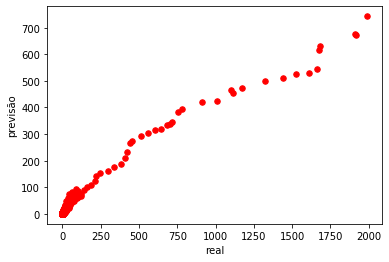

In [136]:
plt.scatter(df_mortes_teste_lasso['real'], df_mortes_teste_lasso['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [137]:
df_mortes_teste_lasso.describe()

,real,previsão
count,8794.00000,8794.00000
mean,5.53411,3.30373
std,67.05556,26.78364
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,1.00000,1.00000
max,1986.00000,743.00000


Com log1p:

*  	real 	previsão
* count 	8794.00000 	8794.00000
* mean 	5.53411 	3.30373
* std 	67.05556 	26.78364
* min 	0.00000 	0.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	1.00000 	1.00000
* max 	1986.00000 	743.00000

In [138]:
df_mortes_teste_lasso[df_mortes_teste_lasso['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [139]:
erro_teste = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index <= dia]['real'].values,
                        df_mortes_baseline_lasso[df_mortes_baseline_lasso.index <= dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')
erro_teste['Gradient Boosting Com Modificação da Distr. Target (laço)'] = check_erro(df_mortes_teste_lasso['real'],
                                                                df_mortes_teste_lasso['previsão'])

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [140]:
erro_teste

,Baseline,Gradient Boosting Com Modificação da Distr. Target (laço)
Base Teste,,
VIÉS,0.36453,2.23038
MSE,21.03945,1699.40573
RMSE,4.58688,41.22385
MAE,0.38204,2.48465
MAPE,nan,inf


Com log1p:
*  	Baseline 	Regressão Linear ScikitLearn (lasso)
* Base Teste 		
* VIÉS 	0.36453 	2.23038
* MSE 	21.03945 	1699.40573
* RMSE 	4.58688 	41.22385
* MAE 	0.38204 	2.48465
* MAPE 	nan 	inf

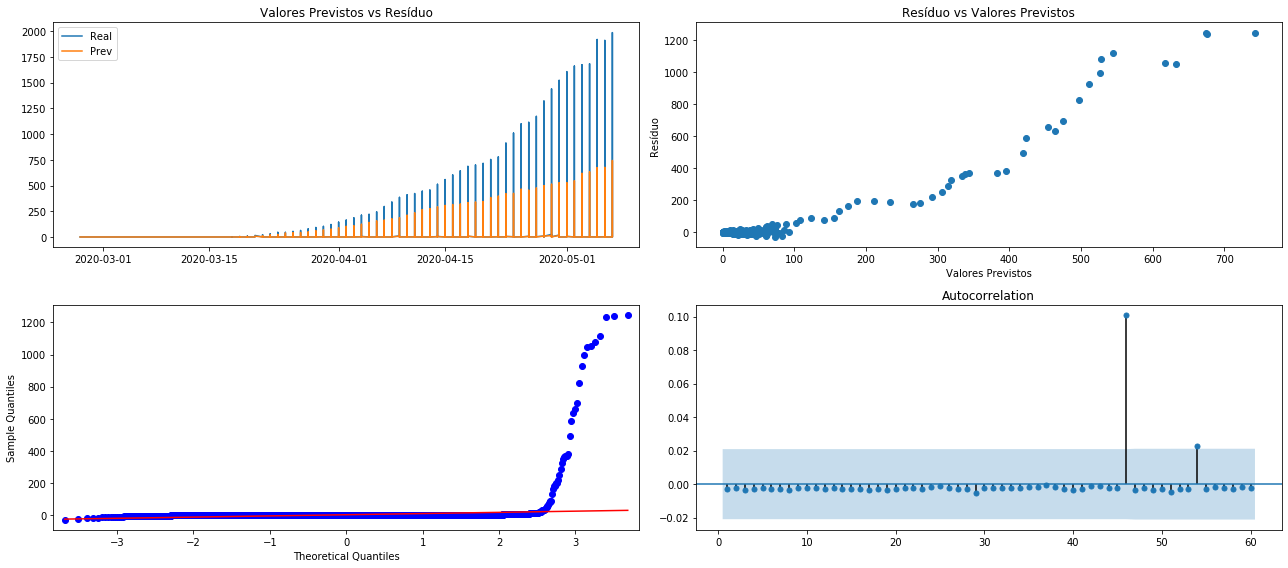

In [141]:
plotar_erro(df_mortes_teste_lasso)

* Com Gradient Boosting com GridSearch com modificação da distribuição da target, o laço funcionou durante todos os 128 dias, com indicadores de erros aumentando gradativamente. Com a base teste, o Gradient Boosting com GridSearch e modificação da distribuição da target teve desempenho pior que o Gradient Boosting sem modificação da distribuição da target: o MAE subiu para 2.48 mortes.


## 2.2. Método de Previsão Tradicional

### 2.2.1. Separando as bases de teste e de treino

In [142]:
explicativas

,dias_epidemiológicos,dia_do_ano,mês,habitantes,lat,lon,idhm_2010,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil,LE_munuf,LE_Nome_Mesorregião
0,1,57,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
1,2,58,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
2,3,59,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
3,4,60,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
4,5,61,3,12252023,-23.54800,-46.63600,0.80500,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,18,128,5,6638,-22.07300,-50.30800,0.73200,0,0,0,0,0,0,0,0,0,0,0,0,0.53000,2,2,2,2,2,2,2,2,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,278,8
8791,40,128,5,35653,-22.54900,-47.91400,0.75500,12,4,4,2,0,0,20,36,8,2,0,0,0.53000,27,28,26,26,26,24,17,6,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,341,10
8792,21,128,5,6357,-23.13400,-49.05400,0.68500,0,0,0,0,0,0,3,5,4,0,0,0,0.53000,10,10,10,10,10,10,9,9,9,9,9,9,9,9,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,0,0,1,0,0,0,1,14,3
8793,36,128,5,18705,-22.47600,-46.63300,0.74500,1,7,2,2,0,0,3,15,6,6,0,0,0.53000,4,4,4,4,4,4,4,4,5,3,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,380,4


In [143]:
len(explicativas)*0.8

7036.0

In [144]:
explicativas.iloc[7036]

dias_epidemiológicos             7.00000
dia_do_ano                     124.00000
mês                              5.00000
habitantes                   21496.00000
lat                            -21.35900
                                 ...    
faixa_pop_Maior de 100 mil       0.00000
faixa_pop_Maior de 50 mil        0.00000
faixa_pop_Menor de 10 mil        0.00000
LE_munuf                       269.00000
LE_Nome_Mesorregião             12.00000
Name: 7036, Length: 59, dtype: float64

In [145]:
explicativas[explicativas['dia_do_ano']<125]

,dias_epidemiológicos,dia_do_ano,mês,habitantes,lat,lon,idhm_2010,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil,LE_munuf,LE_Nome_Mesorregião
0,1,57,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
1,2,58,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
2,3,59,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
3,4,60,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
4,5,61,3,12252023,-23.54800,-46.63600,0.80500,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7359,11,124,5,36305,-22.05900,-46.97900,0.71500,0,0,0,0,0,0,0,0,0,0,0,0,0.53000,14,14,15,13,13,1,1,1,1,0,0,0,0,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,4
7360,31,124,5,35292,-21.34000,-47.72900,0.75600,1,1,0,0,0,0,3,10,0,0,0,0,0.53000,8,8,8,8,8,8,8,8,8,7,7,7,6,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,87,12
7361,19,124,5,69116,-20.28400,-50.24600,0.79700,15,17,9,5,0,5,21,49,7,7,0,0,0.53000,10,10,10,9,9,9,8,8,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,107,13
7362,53,124,5,194276,-23.54100,-46.36900,0.73800,0,0,0,0,0,0,60,80,29,27,11,2,0.61000,103,98,98,95,86,75,74,67,62,60,59,58,55,56,6,6,6,6,5,3,3,3,3,3,3,3,2,2,0,0,0,0,0,1,1,0,0,108,9


#### 2.2.1.1. Casos acumulados

##### Sem modificação da distribuição target

In [146]:
x_treino1 = expl_casos[explicativas['dia_do_ano']<125]
x_teste1 = expl_casos[explicativas['dia_do_ano']>=125]
y_treino1 = target_casos[dados_sel['dia_do_ano']<125]
y_teste1 = target_casos[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino1), (len(x_treino1)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste1), (len(x_teste1)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [147]:
x_treino1.shape

(7364, 53)

In [148]:
y_treino1.shape

(7364,)

##### Com modificação da distribuição target

In [149]:
y_treino1log = target_casos_log[dados_sel['dia_do_ano']<125]
y_teste1log = target_casos_log[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino1), (len(x_treino1)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste1), (len(x_teste1)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [150]:
y_treino1log.shape

(7364,)

#### 2.2.1.2. Mortes acumuladas

##### Sem modificação da distribuição target

In [151]:
x_treino2 = expl_mortes[explicativas['dia_do_ano']<125]
x_teste2 = expl_mortes[explicativas['dia_do_ano']>=125]
y_treino2 = target_mortes[dados_sel['dia_do_ano']<125]
y_teste2 = target_mortes[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino2), (len(x_treino2)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste2), (len(x_teste2)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [152]:
x_treino2.shape

(7364, 47)

In [153]:
y_treino2.shape

(7364,)

##### Com modificação da distribuição target

In [154]:
y_treino2log = target_mortes_log[dados_sel['dia_do_ano']<125]
y_teste2log = target_mortes_log[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino2), (len(x_treino2)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste2), (len(x_teste2)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [155]:
y_treino2log.shape

(7364,)

### 2.2.2. Gradient Boosting

#### 2.2.2.1. Casos Acumulados

##### Sem modificação da distribuição target

In [156]:
GB = GradientBoostingRegressor(random_state=14)

In [157]:
grid_GB = {'loss':['ls', 'lad', 'huber', 'quantile'],
           #'learning_rate':[0.1,0.5],
           'n_estimators':[100, 250, 500],
           'subsample':[1.0],
           'criterion' : ['mae'],           
           'min_samples_split' : [2],
           #'min_samples_leaf':[1, 10, 30, 50, 100, 500],
           #'min_weight_fraction_leaf':[0.0, 0.5, 1.0],
           #'max_depth':[3],           
           'min_impurity_decrease': [0.1,0.01,0.001],           
           #'init':[None],
           'random_state':[14],
           'max_features':["log2"],
           #'alpha':[0.9]
           'verbose':[0],
           #'max_leaf_nodes' : [None, 5, 10, 50, 100, 1000],
           #'warm_start':[True, False],
           #'validation_fraction':[0.1],
           #'n_iter_no_change':[None],
           #'tol':[1e-4],
           #'ccp_alpha':[0.0, 0.1,0.5,1.0],           
           }

In [158]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [159]:
grid_GB_treino = GridSearchCV(estimator=GB,
                                param_grid=grid_GB,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_GB_treino.fit(x_treino1, y_treino1)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 23.8min finished


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=14),
             param_grid={'criterion': ['mae'],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'max_features': ['log2'],
                         'min_impurity_decrease': [0.1, 0.01, 0.001],
                         'min_samples_split': [2],
                         'n_estimators': [100, 250, 500], 'random_state': [14],
                         'subsample': [1.0], 'verbose': [0]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [160]:
grid_GB_treino.best_params_

{'criterion': 'mae',
 'loss': 'huber',
 'max_features': 'log2',
 'min_impurity_decrease': 0.001,
 'min_samples_split': 2,
 'n_estimators': 500,
 'random_state': 14,
 'subsample': 1.0,
 'verbose': 0}

In [161]:
grid_GB_best = grid_GB_treino.best_estimator_

In [162]:
y_pred1 = grid_GB_best.predict(x_treino1)
y_pred1 = pd.DataFrame(y_pred1, columns=['previsão'])

In [163]:
df_casos_GB_treino = dados_tratados[['data', 'casos_acumulados']].copy()
df_casos_GB_treino = df_casos_GB_treino.iloc[0:7364]
df_casos_GB_treino = pd.concat([df_casos_GB_treino,y_pred1], axis=1, join='inner')
df_casos_GB_treino.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real'}
df_casos_GB_treino.rename(columns=colunas, inplace=True)
df_casos_GB_treino

,real,previsão
data,,
2020-02-26,1,0.91290
2020-02-27,1,0.91290
2020-02-28,1,1.01911
2020-02-29,1,7.73488
2020-03-01,1,1.90681
...,...,...
2020-05-03,14,16.59793
2020-05-03,8,9.40641
2020-05-03,10,10.81458


Text(0, 0.5, 'previsão')

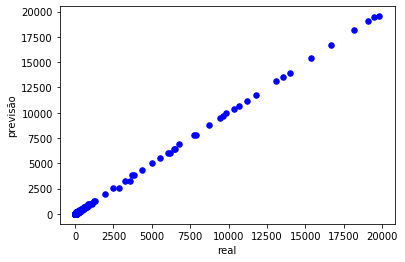

In [164]:
plt.scatter(df_casos_GB_treino['real'], df_casos_GB_treino['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [165]:
df_casos_GB_treino.describe()

,real,previsão
count,7364.00000,7364.00000
mean,65.09791,64.95825
std,723.44974,722.29982
min,1.00000,0.69174
25%,1.00000,1.26086
50%,3.00000,3.19480
75%,11.00000,10.93700
max,19822.00000,19538.97002


*  	real 	previsão
* count 	7364.00000 	7364.00000
* mean 	65.09791 	64.95825
* std 	723.44974 	722.29982
* min 	1.00000 	0.69174
* 25% 	1.00000 	1.26086
* 50% 	3.00000 	3.19480
* 75% 	11.00000 	10.93700
* max 	19822.00000 	19538.97002

In [166]:
df_casos_GB_treino[df_casos_GB_treino['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [167]:
df_casos_baseline_treino = df_casos.iloc[0:7364]
erro_treino = check_erro(df_casos_baseline_treino['real'].values,
                         df_casos_baseline_treino['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Treino')
erro_treino['Gradient Boosting Sem Modificação da Distr. Target'] = check_erro(df_casos_GB_treino['real'], df_casos_GB_treino['previsão'])
erro_treino

,Baseline,Gradient Boosting Sem Modificação da Distr. Target
Base Treino,,
VIÉS,4.31545,0.13966
MSE,2087.44337,96.86763
RMSE,45.68855,9.84214
MAE,4.41214,2.18027
MAPE,11.90706,18.08424


#### Erro Treino
*  	Baseline 	Gradient Boosting Sem Modificação da Distr. Target
* Base Treino 		
* VIÉS 	4.31545 	0.13966
* MSE 	2087.44337 	96.86763
* RMSE 	45.68855 	9.84214
* MAE 	4.41214 	2.18027
* MAPE 	11.90706 	18.08424

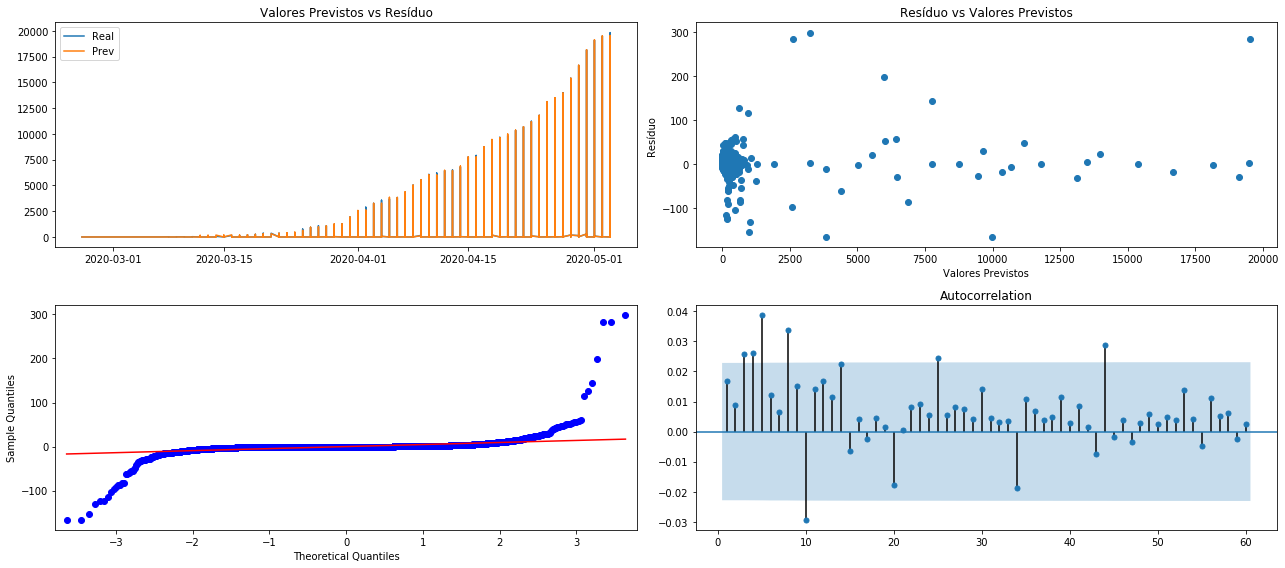

In [168]:
plotar_erro(df_casos_GB_treino)

Com a base treino, o Gradient Boosting com GridSearch sem modificação da distribuição target teve ótima performance sem dar overfit total. O erro absoluto médio foi de 2.18 contra 4.41 da baseline.

In [169]:
y_pred2 = grid_GB_best.predict(x_teste1)
y_pred2 = pd.DataFrame(y_pred2, columns=['previsão'])

In [170]:
df_casos_GB_teste = dados_tratados[['data', 'casos_acumulados']].copy()
df_casos_GB_teste = df_casos_GB_teste.iloc[7364:]
df_casos_GB_teste.reset_index(drop=True, inplace=True)
df_casos_GB_teste = pd.concat([df_casos_GB_teste,y_pred2], axis=1, join='inner')
df_casos_GB_teste.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real'}
df_casos_GB_teste.rename(columns=colunas, inplace=True)
df_casos_GB_teste

,real,previsão
data,,
2020-05-04,4,4.34490
2020-05-04,1,1.25885
2020-05-04,236,256.52748
2020-05-04,14,14.63142
2020-05-04,1,1.15049
...,...,...
2020-05-07,2,2.33261
2020-05-07,36,32.33492
2020-05-07,10,10.88978


Text(0, 0.5, 'previsão')

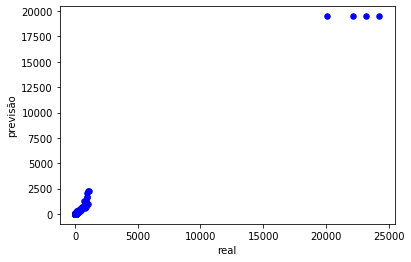

In [171]:
plt.scatter(df_casos_GB_teste['real'], df_casos_GB_teste['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [172]:
df_casos_GB_teste.describe()

,real,previsão
count,1431.00000,1431.00000
mean,101.86723,99.52161
std,1191.41907,1040.11796
min,1.00000,1.10594
25%,2.00000,1.33067
50%,5.00000,5.05554
75%,19.00000,20.46269
max,24273.00000,19494.94493


*  	real 	previsão
* count 	1431.00000 	1431.00000
* mean 	101.86723 	99.52161
* std 	1191.41907 	1040.11796
* min 	1.00000 	1.10594
* 25% 	2.00000 	1.33067
* 50% 	5.00000 	5.05554
* 75% 	19.00000 	20.46269
* max 	24273.00000 	19494.94493

In [173]:
df_casos_GB_teste[df_casos_GB_teste['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [174]:
df_casos_baseline_teste = df_casos.iloc[7364:]
erro_teste = check_erro(df_casos_baseline_teste['real'].values,
                         df_casos_baseline_teste['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Teste')
erro_teste['Gradient Boosting Sem Modificação da Distr. Target'] = check_erro(df_casos_GB_teste['real'], df_casos_GB_teste['previsão'])
erro_teste

,Baseline,Gradient Boosting Sem Modificação da Distr. Target
Base Teste,,
VIÉS,5.69602,2.34562
MSE,4835.93082,35271.02784
RMSE,69.54086,187.80582
MAE,5.92383,17.60390
MAPE,11.07093,19.03619


#### Erro Teste
*  	Baseline 	Gradient Boosting Sem Modificação da Distr. Target
* Base Teste 		
* VIÉS 	5.69602 	2.34562
* MSE 	4835.93082 	35271.02784
* RMSE 	69.54086 	187.80582
* MAE 	5.92383 	17.60390
* MAPE 	11.07093 	19.03619

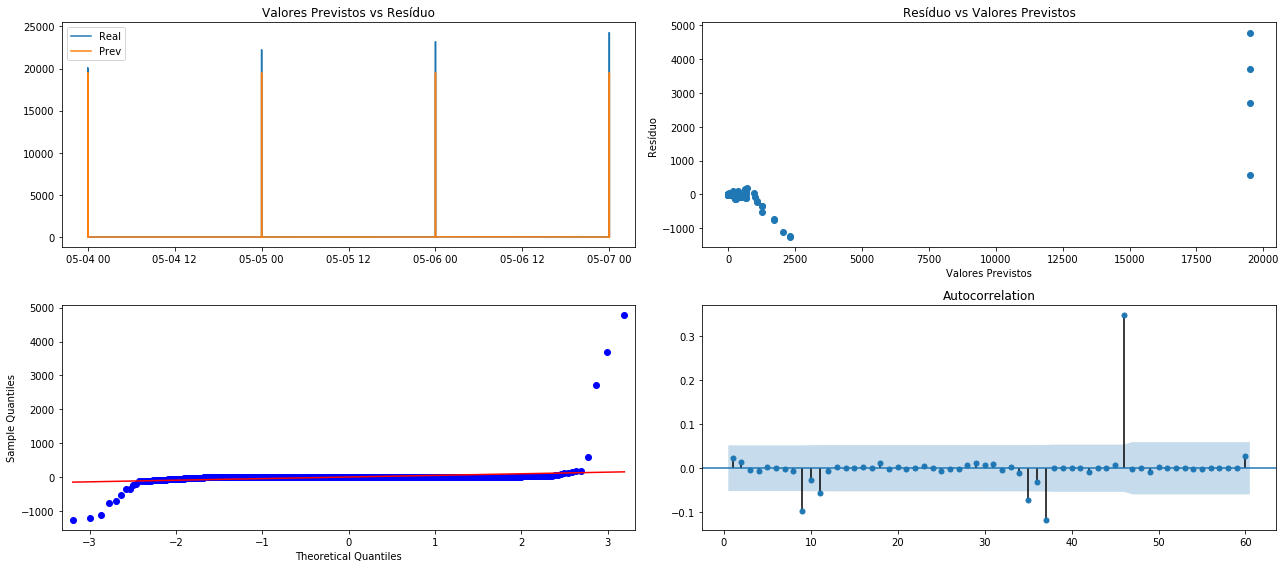

In [175]:
plotar_erro(df_casos_GB_teste)

Com a base teste, o Gradient Boosting com GridSearch sem modificação da distribuição target teve desempenho pior que a baseline, e um pouco melhor que a Random Forest com GridSearch. O erro médio absoluto foi de 17.6 casos, contra 18.8 na Random Forest com GridSearch, contra 5.9 casos na baseline (que apenas repete o resultado do dia anterior).

##### Com modificação da distribuição target

In [176]:
GB = GradientBoostingRegressor(random_state=14)

In [177]:
grid_GB = {'loss':['ls', 'lad', 'huber', 'quantile'],
           #'learning_rate':[0.1,0.5],
           'n_estimators':[100, 250, 500],
           'subsample':[1.0],
           'criterion' : ['mae'],           
           'min_samples_split' : [2],
           #'min_samples_leaf':[1, 10, 30, 50, 100, 500],
           #'min_weight_fraction_leaf':[0.0, 0.5, 1.0],
           #'max_depth':[3],           
           'min_impurity_decrease': [0.1,0.01,0.001],           
           #'init':[None],
           'random_state':[14],
           'max_features':["log2"],
           #'alpha':[0.9]
           'verbose':[0],
           #'max_leaf_nodes' : [None, 5, 10, 50, 100, 1000],
           #'warm_start':[True, False],
           #'validation_fraction':[0.1],
           #'n_iter_no_change':[None],
           #'tol':[1e-4],
           #'ccp_alpha':[0.0, 0.1,0.5,1.0],           
           }

In [178]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [179]:
grid_GB_treino = GridSearchCV(estimator=GB,
                                param_grid=grid_GB,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_GB_treino.fit(x_treino1, y_treino1log)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 19.0min finished


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=14),
             param_grid={'criterion': ['mae'],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'max_features': ['log2'],
                         'min_impurity_decrease': [0.1, 0.01, 0.001],
                         'min_samples_split': [2],
                         'n_estimators': [100, 250, 500], 'random_state': [14],
                         'subsample': [1.0], 'verbose': [0]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [180]:
grid_GB_treino.best_params_

{'criterion': 'mae',
 'loss': 'huber',
 'max_features': 'log2',
 'min_impurity_decrease': 0.001,
 'min_samples_split': 2,
 'n_estimators': 500,
 'random_state': 14,
 'subsample': 1.0,
 'verbose': 0}

In [181]:
grid_GB_best = grid_GB_treino.best_estimator_

In [182]:
y_pred1 = grid_GB_best.predict(x_treino1)
y_pred1 = pd.DataFrame(y_pred1, columns=['previsão'])
y_pred1 = np.expm1(y_pred1).round(decimals=0)

In [183]:
df_casos_GB_treino = dados_tratados[['data', 'casos_acumulados']].copy()
df_casos_GB_treino = df_casos_GB_treino.iloc[0:7364]
df_casos_GB_treino = pd.concat([df_casos_GB_treino,y_pred1], axis=1, join='inner')
df_casos_GB_treino.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real'}
df_casos_GB_treino.rename(columns=colunas, inplace=True)
df_casos_GB_treino

,real,previsão
data,,
2020-02-26,1,1.00000
2020-02-27,1,1.00000
2020-02-28,1,1.00000
2020-02-29,1,1.00000
2020-03-01,1,1.00000
...,...,...
2020-05-03,14,13.00000
2020-05-03,8,10.00000
2020-05-03,10,11.00000


Text(0, 0.5, 'previsão')

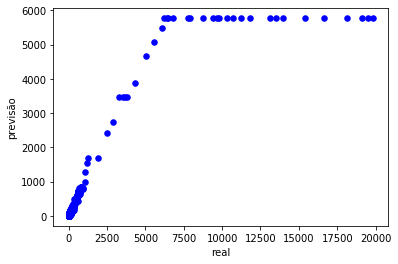

In [184]:
plt.scatter(df_casos_GB_treino['real'], df_casos_GB_treino['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [185]:
df_casos_GB_treino.describe()

,real,previsão
count,7364.00000,7364.00000
mean,65.09791,45.30228
std,723.44974,359.13587
min,1.00000,1.00000
25%,1.00000,1.00000
50%,3.00000,3.00000
75%,11.00000,11.00000
max,19822.00000,5772.00000


*  	real 	previsão
* count 	7364.00000 	7364.00000
* mean 	65.09791 	45.30228
* std 	723.44974 	359.13587
* min 	1.00000 	1.00000
* 25% 	1.00000 	1.00000
* 50% 	3.00000 	3.00000
* 75% 	11.00000 	11.00000
* max 	19822.00000 	5772.00000

In [186]:
df_casos_GB_treino[df_casos_GB_treino['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [187]:
df_casos_baseline_treino = df_casos.iloc[0:7364]
erro_treino = check_erro(df_casos_baseline_treino['real'].values,
                         df_casos_baseline_treino['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Treino')
erro_treino['Gradient Boosting Com Modificação da Distr. Target'] = check_erro(df_casos_GB_treino['real'], df_casos_GB_treino['previsão'])
erro_treino

,Baseline,Gradient Boosting Com Modificação da Distr. Target
Base Treino,,
VIÉS,4.31545,19.79563
MSE,2087.44337,174608.50883
RMSE,45.68855,417.86183
MAE,4.41214,22.49661
MAPE,11.90706,13.22346


#### Erro Treino
*  	Baseline 	Gradient Boosting Com Modificação da Distr. Target
* Base Treino 		
* VIÉS 	4.31545 	19.79563
* MSE 	2087.44337 	174608.50883
* RMSE 	45.68855 	417.86183
* MAE 	4.41214 	22.49661
* MAPE 	11.90706 	13.22346

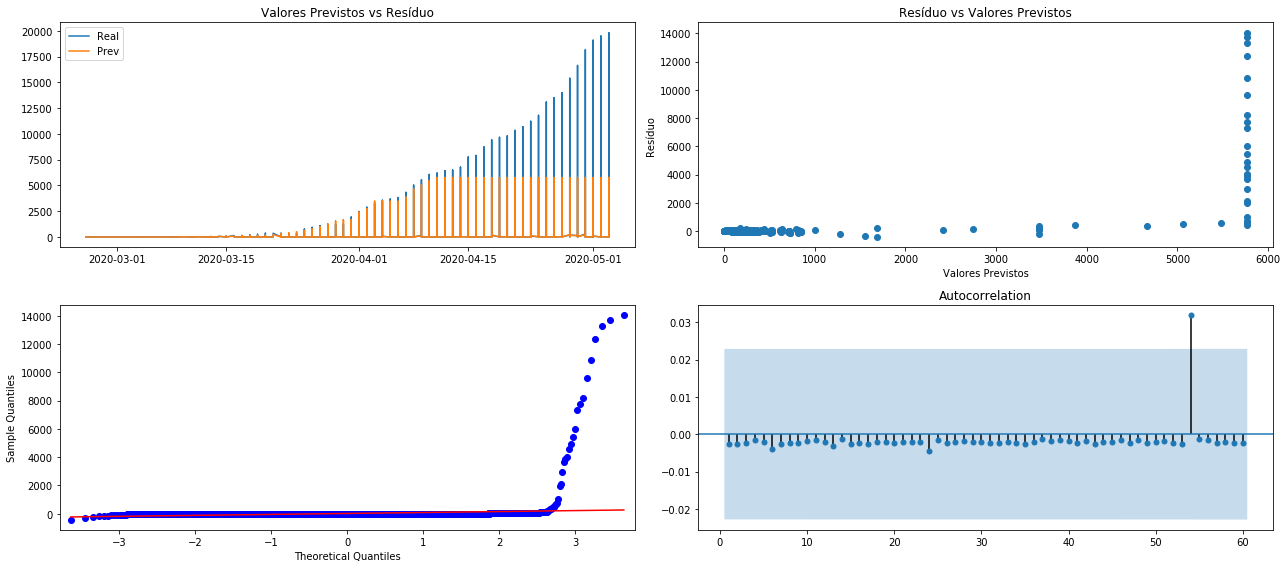

In [188]:
plotar_erro(df_casos_GB_treino)

Com a base treino, o Gradient Boosting com modificação da distribuição target e GridSearch não deu overfit, mas a previsão criou um platô por volta do dia 7/4, invalidando o modelo.

In [189]:
y_pred2 = grid_GB_best.predict(x_teste1)
y_pred2 = pd.DataFrame(y_pred2, columns=['previsão'])
y_pred2 = np.expm1(y_pred2).round(decimals=0)

In [190]:
df_casos_GB_teste = dados_tratados[['data', 'casos_acumulados']].copy()
df_casos_GB_teste = df_casos_GB_teste.iloc[7364:]
df_casos_GB_teste.reset_index(drop=True, inplace=True)
df_casos_GB_teste = pd.concat([df_casos_GB_teste,y_pred2], axis=1, join='inner')
df_casos_GB_teste.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real'}
df_casos_GB_teste.rename(columns=colunas, inplace=True)
df_casos_GB_teste

,real,previsão
data,,
2020-05-04,4,5.00000
2020-05-04,1,1.00000
2020-05-04,236,297.00000
2020-05-04,14,21.00000
2020-05-04,1,1.00000
...,...,...
2020-05-07,2,2.00000
2020-05-07,36,19.00000
2020-05-07,10,11.00000


Text(0, 0.5, 'previsão')

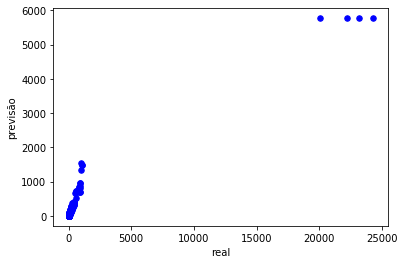

In [191]:
plt.scatter(df_casos_GB_teste['real'], df_casos_GB_teste['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [192]:
df_casos_GB_teste.describe()

,real,previsão
count,1431.00000,1431.00000
mean,101.86723,55.76520
std,1191.41907,328.24902
min,1.00000,1.00000
25%,2.00000,1.00000
50%,5.00000,5.00000
75%,19.00000,20.00000
max,24273.00000,5772.00000


*  	real 	previsão
* count 	1431.00000 	1431.00000
* mean 	101.86723 	55.76520
* std 	1191.41907 	328.24902
* min 	1.00000 	1.00000
* 25% 	2.00000 	1.00000
* 50% 	5.00000 	5.00000
* 75% 	19.00000 	20.00000
* max 	24273.00000 	5772.00000

In [193]:
df_casos_GB_teste[df_casos_GB_teste['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [194]:
df_casos_baseline_teste = df_casos.iloc[7364:]
erro_teste = check_erro(df_casos_baseline_teste['real'].values,
                         df_casos_baseline_teste['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Teste')
erro_teste['Gradient Boosting Com Modificação da Distr. Target'] = check_erro(df_casos_GB_teste['real'], df_casos_GB_teste['previsão'])
erro_teste

,Baseline,Gradient Boosting Com Modificação da Distr. Target
Base Teste,,
VIÉS,5.69602,46.10203
MSE,4835.93082,783583.57372
RMSE,69.54086,885.20256
MAE,5.92383,52.67785
MAPE,11.07093,14.79196


#### Erro Teste
*  	Baseline 	Gradient Boosting Com Modificação da Distr. Target
* Base Teste 		
* VIÉS 	5.69602 	46.10203
* MSE 	4835.93082 	783583.57372
* RMSE 	69.54086 	885.20256
* MAE 	5.92383 	52.67785
* MAPE 	11.07093 	14.79196

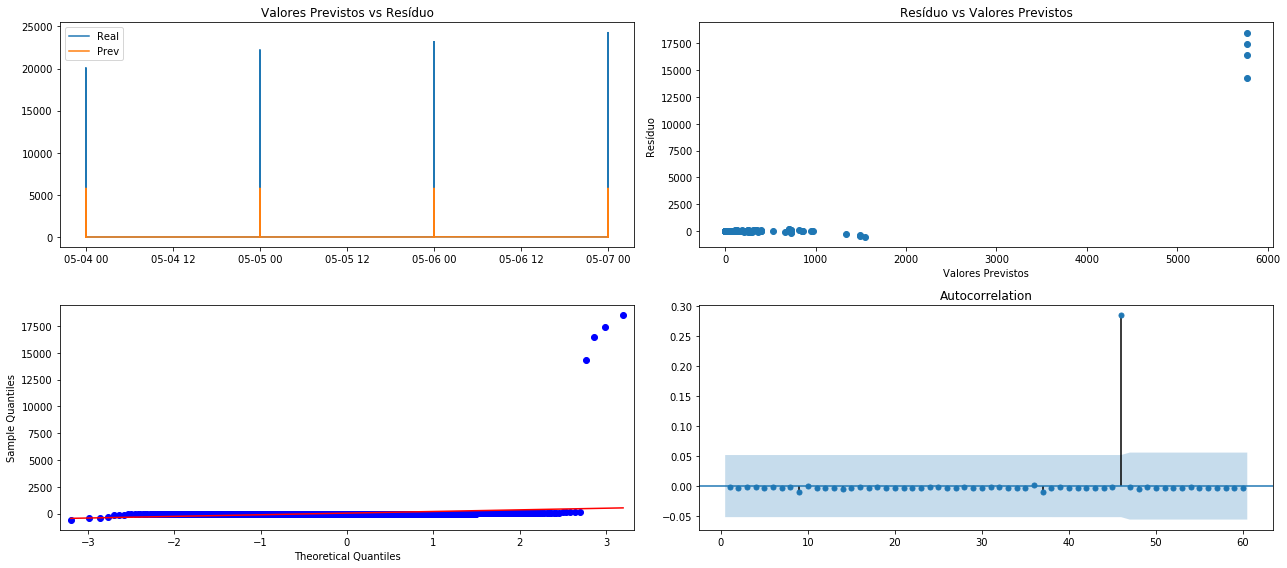

In [195]:
plotar_erro(df_casos_GB_teste)

Com a base teste, a Gradient Boosting com modificação da distribuição target e GridSearch teve desempenho pior que a baseline e que a Random Forest com GridSearch. O erro médio absoluto foi de 52.67 casos contra 35.25 casos com a Random Forest, contra 5.9 casos na baseline (que apenas repete o resultado do dia anterior).

#### 2.2.2.2. Mortes Acumuladas

##### Sem modificação da distribuição target

In [196]:
GB = GradientBoostingRegressor(random_state=14)

In [197]:
grid_GB = {'loss':['ls', 'lad', 'huber', 'quantile'],
           #'learning_rate':[0.1,0.5],
           'n_estimators':[100, 250, 500],
           'subsample':[1.0],
           'criterion' : ['mae'],           
           'min_samples_split' : [2],
           #'min_samples_leaf':[1, 10, 30, 50, 100, 500],
           #'min_weight_fraction_leaf':[0.0, 0.5, 1.0],
           #'max_depth':[3],           
           'min_impurity_decrease': [0.1,0.01,0.001],           
           #'init':[None],
           'random_state':[14],
           'max_features':["log2"],
           #'alpha':[0.9]
           'verbose':[0],
           #'max_leaf_nodes' : [None, 5, 10, 50, 100, 1000],
           #'warm_start':[True, False],
           #'validation_fraction':[0.1],
           #'n_iter_no_change':[None],
           #'tol':[1e-4],
           #'ccp_alpha':[0.0, 0.1,0.5,1.0],           
           }

In [198]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [199]:
grid_GB_treino = GridSearchCV(estimator=GB,
                                param_grid=grid_GB,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_GB_treino.fit(x_treino2,y_treino2)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 17.4min finished


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=14),
             param_grid={'criterion': ['mae'],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'max_features': ['log2'],
                         'min_impurity_decrease': [0.1, 0.01, 0.001],
                         'min_samples_split': [2],
                         'n_estimators': [100, 250, 500], 'random_state': [14],
                         'subsample': [1.0], 'verbose': [0]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [200]:
grid_GB_treino.best_params_

{'criterion': 'mae',
 'loss': 'ls',
 'max_features': 'log2',
 'min_impurity_decrease': 0.001,
 'min_samples_split': 2,
 'n_estimators': 500,
 'random_state': 14,
 'subsample': 1.0,
 'verbose': 0}

In [201]:
grid_GB_best = grid_GB_treino.best_estimator_

In [202]:
y_pred1 = grid_GB_best.predict(x_treino2)
y_pred1 = pd.DataFrame(y_pred1, columns=['previsão'])

In [203]:
df_mortes_GB_treino = dados_tratados[['data', 'mortes_acumuladas']].copy()
df_mortes_GB_treino = df_mortes_GB_treino.iloc[0:7364]
df_mortes_GB_treino = pd.concat([df_mortes_GB_treino,y_pred1], axis=1, join='inner')
df_mortes_GB_treino.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real'}
df_mortes_GB_treino.rename(columns=colunas, inplace=True)
df_mortes_GB_treino

,real,previsão
data,,
2020-02-26,0,0.01668
2020-02-27,0,0.01668
2020-02-28,0,0.01668
2020-02-29,0,0.01668
2020-03-01,0,0.01668
...,...,...
2020-05-03,2,1.80197
2020-05-03,1,1.01337
2020-05-03,0,0.05105


Text(0, 0.5, 'previsão')

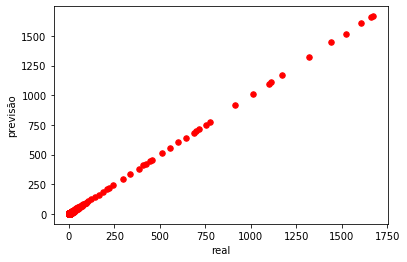

In [204]:
plt.scatter(df_mortes_GB_treino['real'], df_mortes_GB_treino['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [205]:
df_mortes_GB_treino.describe()

,real,previsão
count,7364.00000,7364.00000
mean,4.98669,4.89340
std,58.68772,58.64835
min,0.00000,-0.10135
25%,0.00000,0.00000
50%,0.00000,0.01571
75%,1.00000,1.02150
max,1673.00000,1666.11709


*  	real 	previsão
* count 	7364.00000 	7364.00000
* mean 	4.98669 	4.89340
* std 	58.68772 	58.64835
* min 	0.00000 	-0.10135
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.01571
* 75% 	1.00000 	1.02150
* max 	1673.00000 	1666.11709

In [206]:
df_mortes_GB_treino[df_mortes_GB_treino['previsão'] < 0]

,real,previsão
data,,
2020-03-10,0,-0.00694
2020-03-11,0,-0.02488
2020-03-14,0,-0.00349
2020-03-15,0,-0.00349
2020-03-16,0,-0.00349
...,...,...
2020-05-02,0,-0.01381
2020-05-02,0,-0.00900
2020-05-03,0,-0.03176


Regressão linear sem polinômio:
* sem previsões negativas

In [207]:
df_mortes_baseline_treino = df_mortes.iloc[0:7364]
erro_treino = check_erro(df_mortes_baseline_treino['real'].values,
                         df_mortes_baseline_treino['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Treino')
erro_treino['Gradient Boosting Sem Modificação da Distr. Target'] = check_erro(df_mortes_GB_treino['real'], df_mortes_GB_treino['previsão'])
erro_treino

,Baseline,Gradient Boosting Sem Modificação da Distr. Target
Base Treino,,
VIÉS,0.35646,0.09329
MSE,16.43061,0.45008
RMSE,4.05347,0.67088
MAE,0.36353,0.22870
MAPE,9.64655,inf


#### Erro Treino
*  	Baseline 	Regressão Linear ScikitLearn
* Base Treino 		
* VIÉS 	0.35646 	0.09329
* MSE 	16.43061 	0.45008
* RMSE 	4.05347 	0.67088
* MAE 	0.36353 	0.22870
* MAPE 	9.64655 	inf

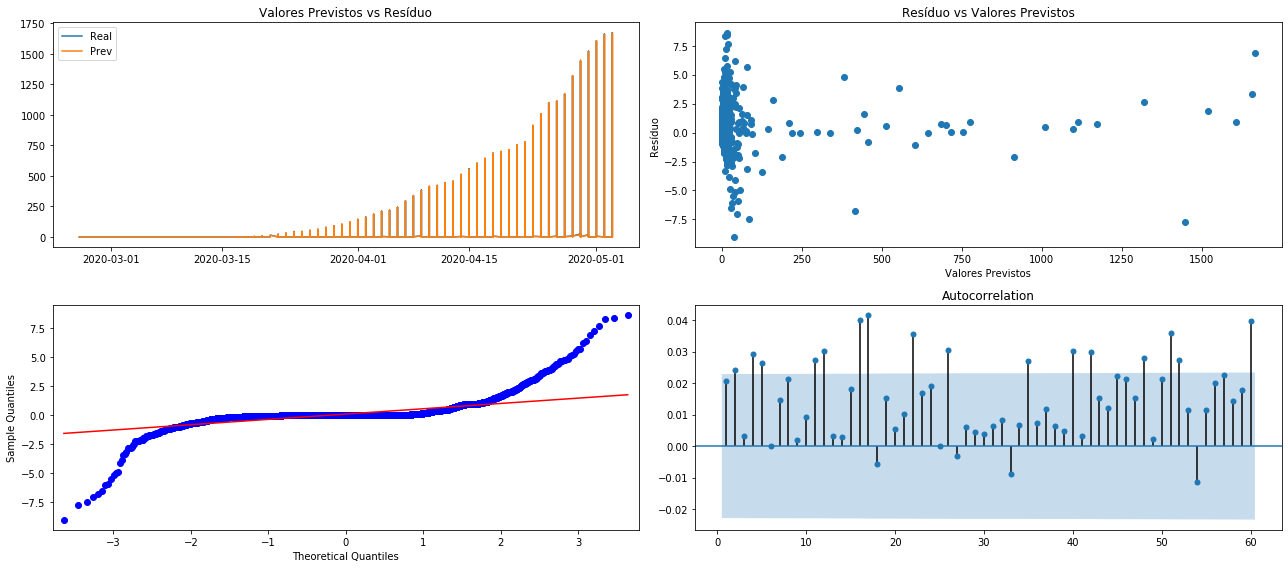

In [208]:
plotar_erro(df_mortes_GB_treino)

Com a base treino, o Gradient Boosting com GridSearch sem modificação da distribuição target não deu overfit, e apresentou métricas melhores que a baseline.

In [209]:
y_pred2 = grid_GB_best.predict(x_teste2)
y_pred2 = pd.DataFrame(y_pred2, columns=['previsão'])

In [210]:
df_mortes_GB_teste = dados_tratados[['data', 'mortes_acumuladas']].copy()
df_mortes_GB_teste = df_mortes_GB_teste.iloc[7364:]
df_mortes_GB_teste.reset_index(drop=True, inplace=True)
df_mortes_GB_teste = pd.concat([df_mortes_GB_teste,y_pred2], axis=1, join='inner')
df_mortes_GB_teste.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real'}
df_mortes_GB_teste.rename(columns=colunas, inplace=True)
df_mortes_GB_teste

,real,previsão
data,,
2020-05-04,0,0.03789
2020-05-04,0,0.00000
2020-05-04,11,13.41367
2020-05-04,3,3.27606
2020-05-04,1,1.02150
...,...,...
2020-05-07,0,0.00000
2020-05-07,0,0.08960
2020-05-07,2,2.30873


Text(0, 0.5, 'previsão')

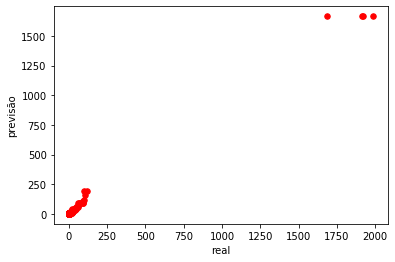

In [211]:
plt.scatter(df_mortes_GB_teste['real'], df_mortes_GB_teste['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [212]:
df_mortes_GB_teste.describe()

,real,previsão
count,1431.00000,1431.00000
mean,8.34731,8.10990
std,99.52253,88.73256
min,0.00000,-0.04067
25%,0.00000,0.00000
50%,0.00000,0.06545
75%,2.00000,1.83157
max,1986.00000,1666.11709


*  	real 	previsão
* count 	1431.00000 	1431.00000
* mean 	8.34731 	8.10990
* std 	99.52253 	88.73256
* min 	0.00000 	-0.04067
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.06545
* 75% 	2.00000 	1.83157
* max 	1986.00000 	1666.11709

In [213]:
df_mortes_GB_teste[df_mortes_GB_teste['previsão'] < 0]

,real,previsão
data,,
2020-05-04,0,-0.02693
2020-05-04,0,-0.01661
2020-05-04,0,-0.03060
2020-05-05,0,-0.00634
2020-05-05,0,-0.01381
...,...,...
2020-05-07,0,-0.00634
2020-05-07,0,-0.03718
2020-05-07,0,-0.02756


* 23 previsões negativas.

In [214]:
df_mortes_baseline_teste = df_mortes.iloc[7364:]
erro_teste = check_erro(df_mortes_baseline_teste['real'].values,
                         df_mortes_baseline_teste['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Teste')
erro_teste['Gradient Boosting Sem Modificação da Distr. Target'] = check_erro(df_mortes_GB_teste['real'], df_mortes_GB_teste['previsão'])
erro_teste

,Baseline,Gradient Boosting Sem Modificação da Distr. Target
Base Teste,,
VIÉS,0.40601,0.23741
MSE,44.75681,172.76360
RMSE,6.69005,13.14396
MAE,0.47729,1.18706
MAPE,6.72089,inf


#### Erro Treino
*  	Baseline 	Gradient Boosting Sem Modificação da Distr. Target
* Base Teste 		
* VIÉS 	0.40601 	0.23741
* MSE 	44.75681 	172.76360
* RMSE 	6.69005 	13.14396
* MAE 	0.47729 	1.18706
* MAPE 	6.72089 	inf

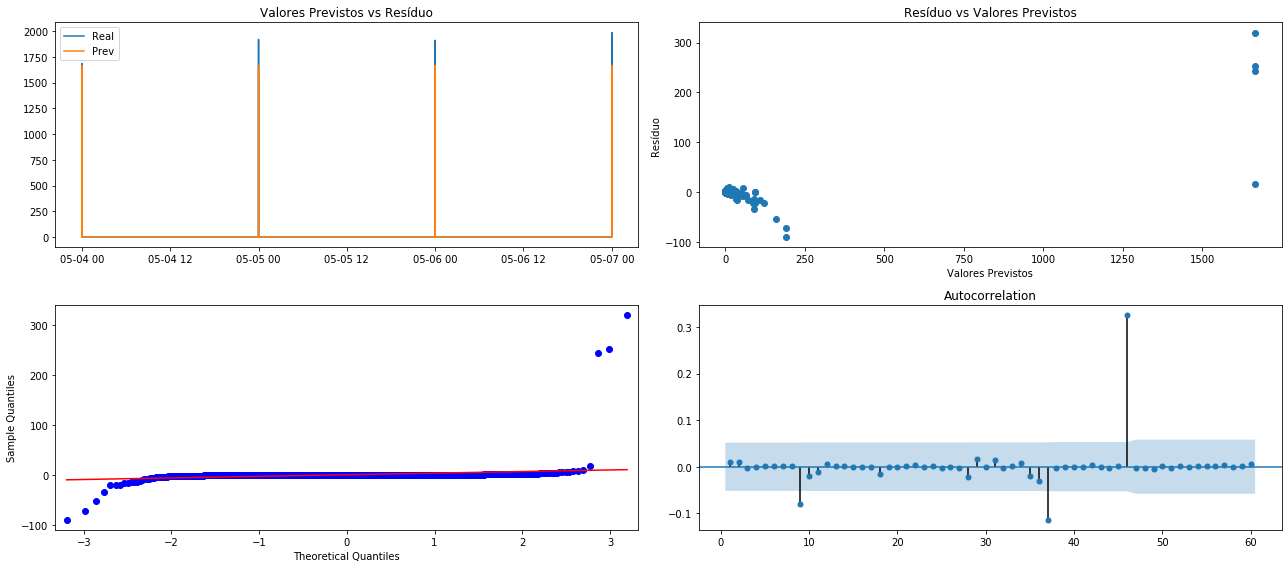

In [215]:
plotar_erro(df_mortes_GB_teste)

Com a base teste, o Gradient Boosting sem modificação da distribuição target e com GridSearch teve desempenho pior que a baseline, e pior que a Random Forest com GridSearch. O erro médio absoluto foi de 1.18 mortes contra 1.13 mortes com a Random Forest, contra 0.47 mortes na baseline (que apenas repete o resultado do dia anterior). A principal causa são os outliers da capital, como dão a entender o RMSE e o gráfico de dispersão.


##### Com modificação da distribuição target

In [216]:
GB = GradientBoostingRegressor(random_state=14)

In [217]:
grid_GB = {'loss':['ls', 'lad', 'huber', 'quantile'],
           #'learning_rate':[0.1,0.5],
           'n_estimators':[100, 250, 500],
           'subsample':[1.0],
           'criterion' : ['mae'],           
           'min_samples_split' : [2],
           #'min_samples_leaf':[1, 10, 30, 50, 100, 500],
           #'min_weight_fraction_leaf':[0.0, 0.5, 1.0],
           #'max_depth':[3],           
           'min_impurity_decrease': [0.1,0.01,0.001],           
           #'init':[None],
           'random_state':[14],
           'max_features':["log2"],
           #'alpha':[0.9]
           'verbose':[0],
           #'max_leaf_nodes' : [None, 5, 10, 50, 100, 1000],
           #'warm_start':[True, False],
           #'validation_fraction':[0.1],
           #'n_iter_no_change':[None],
           #'tol':[1e-4],
           #'ccp_alpha':[0.0, 0.1,0.5,1.0],           
           }

In [218]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [219]:
grid_GB_treino = GridSearchCV(estimator=GB,
                                param_grid=grid_GB,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_GB_treino.fit(x_treino2,y_treino2log)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 15.8min finished


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=14),
             param_grid={'criterion': ['mae'],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'max_features': ['log2'],
                         'min_impurity_decrease': [0.1, 0.01, 0.001],
                         'min_samples_split': [2],
                         'n_estimators': [100, 250, 500], 'random_state': [14],
                         'subsample': [1.0], 'verbose': [0]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [220]:
grid_GB_treino.best_params_

{'criterion': 'mae',
 'loss': 'ls',
 'max_features': 'log2',
 'min_impurity_decrease': 0.001,
 'min_samples_split': 2,
 'n_estimators': 500,
 'random_state': 14,
 'subsample': 1.0,
 'verbose': 0}

In [221]:
grid_GB_best = grid_GB_treino.best_estimator_

In [222]:
y_pred1 = grid_GB_best.predict(x_treino2)
y_pred1 = pd.DataFrame(y_pred1, columns=['previsão'])
y_pred1 = np.expm1(y_pred1).round(decimals=0)

In [223]:
df_mortes_GB_treino = dados_tratados[['data', 'mortes_acumuladas']].copy()
df_mortes_GB_treino = df_mortes_GB_treino.iloc[0:7364]
df_mortes_GB_treino = pd.concat([df_mortes_GB_treino,y_pred1], axis=1, join='inner')
df_mortes_GB_treino.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real'}
df_mortes_GB_treino.rename(columns=colunas, inplace=True)
df_mortes_GB_treino

,real,previsão
data,,
2020-02-26,0,0.00000
2020-02-27,0,0.00000
2020-02-28,0,0.00000
2020-02-29,0,0.00000
2020-03-01,0,0.00000
...,...,...
2020-05-03,2,2.00000
2020-05-03,1,1.00000
2020-05-03,0,0.00000


Text(0, 0.5, 'previsão')

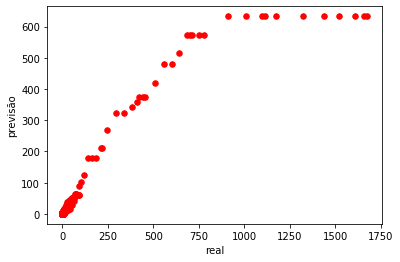

In [224]:
plt.scatter(df_mortes_GB_treino['real'], df_mortes_GB_treino['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [225]:
df_mortes_GB_treino.describe()

,real,previsão
count,7364.00000,7364.00000
mean,4.98669,3.60538
std,58.68772,33.35890
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,1.00000,1.00000
max,1673.00000,633.00000


*  	real 	previsão
* count 	7364.00000 	7364.00000
* mean 	4.98669 	3.60538
* std 	58.68772 	33.35890
* min 	0.00000 	0.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	1.00000 	1.00000
* max 	1673.00000 	633.00000

In [226]:
df_mortes_GB_treino[df_mortes_GB_treino['previsão'] < 0]

,real,previsão
data,,


Regressão linear sem polinômio:
* sem previsões negativas

In [227]:
df_mortes_baseline_treino = df_mortes.iloc[0:7364]
erro_treino = check_erro(df_mortes_baseline_treino['real'].values,
                         df_mortes_baseline_treino['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Treino')
erro_treino['Gradient Boosting Com Modificação da Distr. Target'] = check_erro(df_mortes_GB_treino['real'], df_mortes_GB_treino['previsão'])
erro_treino

,Baseline,Gradient Boosting Com Modificação da Distr. Target
Base Treino,,
VIÉS,0.35646,1.38131
MSE,16.43061,837.13417
RMSE,4.05347,28.93327
MAE,0.36353,1.54590
MAPE,9.64655,16.41296


#### Erro Treino
*  	Baseline 	Gradient Boosting Com Modificação da Distr. Target
* Base Treino 		
* VIÉS 	0.35646 	1.38131
* MSE 	16.43061 	837.13417
* RMSE 	4.05347 	28.93327
* MAE 	0.36353 	1.54590
* MAPE 	9.64655 	16.41296

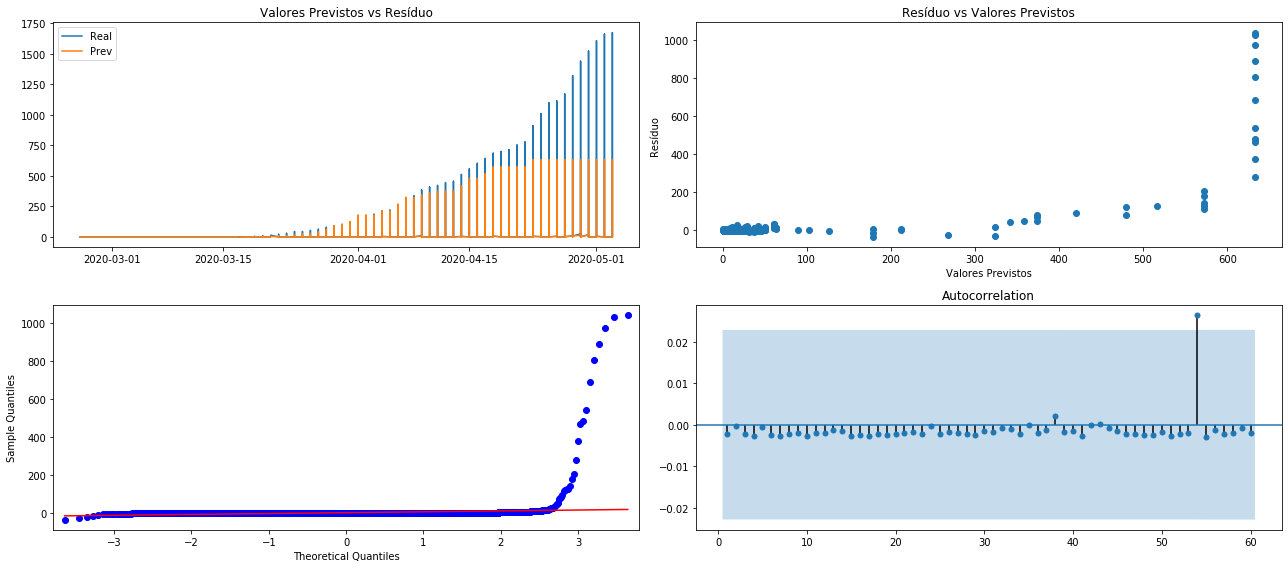

In [228]:
plotar_erro(df_mortes_GB_treino)

Com a base treino, o Gradient Boosting com modificação da distribuição target e GridSearch teve o mesmo comportamento quando lidou com casos: atingiu um platô, dessa vez após 15/04.

In [229]:
y_pred2 = grid_GB_best.predict(x_teste2)
y_pred2 = pd.DataFrame(y_pred2, columns=['previsão'])
y_pred2 = np.expm1(y_pred2).round(decimals=0)

In [230]:
df_mortes_GB_teste = dados_tratados[['data', 'mortes_acumuladas']].copy()
df_mortes_GB_teste = df_mortes_GB_teste.iloc[7364:]
df_mortes_GB_teste.reset_index(drop=True, inplace=True)
df_mortes_GB_teste = pd.concat([df_mortes_GB_teste,y_pred2], axis=1, join='inner')
df_mortes_GB_teste.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real'}
df_mortes_GB_teste.rename(columns=colunas, inplace=True)
df_mortes_GB_teste

,real,previsão
data,,
2020-05-04,0,0.00000
2020-05-04,0,0.00000
2020-05-04,11,13.00000
2020-05-04,3,3.00000
2020-05-04,1,1.00000
...,...,...
2020-05-07,0,0.00000
2020-05-07,0,0.00000
2020-05-07,2,2.00000


Text(0, 0.5, 'previsão')

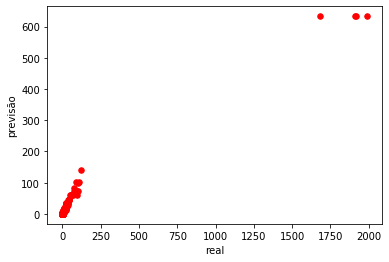

In [231]:
plt.scatter(df_mortes_GB_teste['real'], df_mortes_GB_teste['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [232]:
df_mortes_GB_teste.describe()

,real,previsão
count,1431.00000,1431.00000
mean,8.34731,4.89448
std,99.52253,34.70303
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,2.00000,2.00000
max,1986.00000,633.00000


*  	real 	previsão
* count 	1431.00000 	1431.00000
* mean 	8.34731 	4.89448
* std 	99.52253 	34.70303
* min 	0.00000 	0.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	2.00000 	2.00000
* max 	1986.00000 	633.00000

In [233]:
df_mortes_GB_teste[df_mortes_GB_teste['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas.

In [234]:
df_mortes_baseline_teste = df_mortes.iloc[7364:]
erro_teste = check_erro(df_mortes_baseline_teste['real'].values,
                         df_mortes_baseline_teste['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Teste')
erro_teste['Gradient Boosting Com Modificação da Distr. Target'] = check_erro(df_mortes_GB_teste['real'], df_mortes_GB_teste['previsão'])
erro_teste

,Baseline,Gradient Boosting Com Modificação da Distr. Target
Base Teste,,
VIÉS,0.40601,3.45283
MSE,44.75681,4348.36967
RMSE,6.69005,65.94217
MAE,0.47729,3.91964
MAPE,6.72089,13.70086


#### Erro Teste
*  	Baseline 	Gradient Boosting Com Modificação da Distr. Target
* Base Teste 		
* VIÉS 	0.40601 	3.45283
* MSE 	44.75681 	4348.36967
* RMSE 	6.69005 	65.94217
* MAE 	0.47729 	3.91964
* MAPE 	6.72089 	13.70086

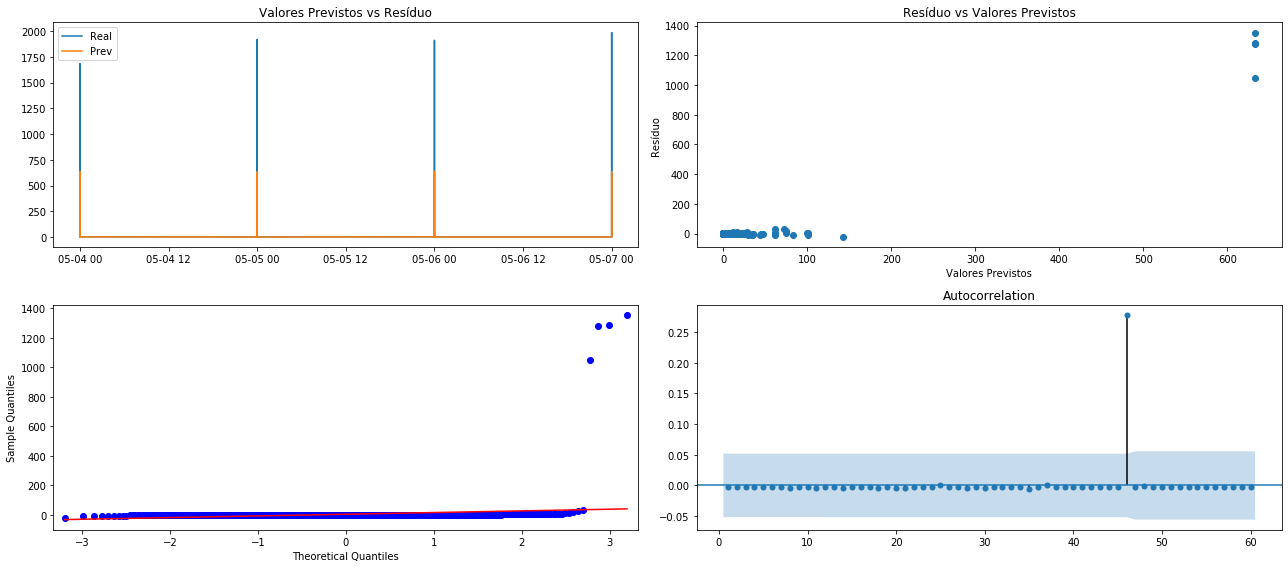

In [235]:
plotar_erro(df_mortes_GB_teste)

Com a base teste, a Gradient Boosting com modificação da distribuição target e GridSearch teve desempenho pior que a baseline e pior que a Random Forest com GridSearch. O erro médio absoluto foi de 3.9 mortes, contra 1.79 mortes na Random Forest, contra 0.47 mortes na baseline (que apenas repete o resultado do dia anterior).
